In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\geroNB\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['vectorize', 'sci']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as sci
import time 
import threading
import sys
import multiprocessing as multiproc
from multiprocessing import Pool
from multiprocessing.dummy import Pool as ThreadPool
import scipy.optimize as opt

# the function library
from projectlib import *

import projectlib



from numba import jit, njit, vectorize

## Setup

In [8]:
dimension = 38
a =  np.loadtxt("./Internal Data/initial_data.txt")
initCond = np.zeros(dimension*4)

b = np.genfromtxt("./Internal Data/initial_data.txt")


for i in range(dimension):
    initCond[i] = b[i, 0]
    initCond[i + dimension] = b[i, 1]
    initCond[i + 2*dimension] = b[i, 2]
    initCond[i + 3*dimension] = b[i, 3]

ic_simple = [[b[i,j] for j in range(4)] for i in range(dimension)]
N = region_setup(dimension)[0]


tzero = np.array([0, 0.4, 0.8])
t = np.linspace(0, 100, 100000)

'''
simulation001 = Data(0.2, 1/14, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])

sol1 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "heaviside", tzero), t_eval=t)
sol = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "constant", tzero), t_eval=t, dense_output=True)
'''

'\nsimulation001 = Data(0.2, 1/14, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])\n\nsol1 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "heaviside", tzero), t_eval=t)\nsol = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "constant", tzero), t_eval=t, dense_output=True)\n'

## Tests

In [ ]:
# attempt to solve without commuting with basic rk4
# not working and not needed
'''
def simple(alpha,beta,ic,dimension,time_step=0.001,start_time=0,stop_time=100):
    """
    Returns an array of points, which the simple system passes by iteratively perfoming each rk4 timestep
    """
    t_out = 0.4

    def func(t,y):
        N = region_setup(dimension)[0]
        tzero = np.array([0, 0.4, 0.8])
        simulation = Data(alpha, beta, dimension, "Pendler.txt", t_out, import_rki_data(N, 7)[2])
        return function_of_system(t, y, simulation, 'simple', tzero)

    y = [ic] # Start Points
    count = 0
    t = start_time
    dt = time_step
    while t < stop_time:
        t+= dt
        tempy = y[count] # Temporary Start Points
        runge_kutta_4 = rk4(func,t,tempy,dt) # Rk4 Function
        tempy += runge_kutta_4
        count +=1
        y.append(tempy)
    return y
'''
#y_simple = simple(0.2,1/14,initCond,dimension, 0.05,0,100)

In [30]:
## Testsimulationen mit alter simple-Einbindung (Abbruch vor Infektionsmaximum)

simulation001 = Data(0.4, 1/14, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])
simulation002 = Data(0.3, 1/14, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])
simulation003 = Data(0.2, 1/14, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])
simulation004 = Data(0.1, 1/14, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])

solheavi = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation003, "heaviside", tzero), t_eval=t, dense_output=True)
solconst = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation003, "constant", tzero), t_eval=t, dense_output=True)

solsimple1 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "simple", tzero), t_eval=t, dense_output=True)
solsimple2 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation002, "simple", tzero), t_eval=t, dense_output=True)
solsimple3 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation003, "simple", tzero), t_eval=t, dense_output=True)
solsimple4 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation004, "simple", tzero), t_eval=t, dense_output=True)

#solsimple3_ = sci.odeint(system_function, initCond, t, args=(simulation003, "simple", tzero))

for sol in [solsimple1, solsimple2, solsimple3, solsimple4]:
    print(sol.y.shape)

print(solsimple3)

(152, 34149)
(152, 48544)
(152, 84093)
(152, 100000)
  message: 'Required step size is less than spacing between numbers.'
     nfev: 494
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x00000239B98540A0>
   status: -1
  success: False
        t: array([0.00000000e+00, 1.00001000e-03, 2.00002000e-03, ...,
       8.40908409e+01, 8.40918409e+01, 8.40928409e+01])
 t_events: None
        y: array([[9.98411991e-01, 9.98411978e-01, 9.98411964e-01, ...,
        2.86475003e-01, 2.86459709e-01, 2.86444416e-01],
       [9.98495558e-01, 9.98495558e-01, 9.98495558e-01, ...,
        9.98495558e-01, 9.98495558e-01, 9.98495558e-01],
       [9.98070320e-01, 9.98070315e-01, 9.98070311e-01, ...,
        4.57308206e-01, 4.57284229e-01, 4.57260254e-01],
       ...,
       [4.18103899e-04, 4.18103929e-04, 4.18103959e-04, ...,
        6.53245222e-03, 6.53291274e-03, 6.53337328e-03],
       [8.62969959e-05, 8.62971044e-05, 8.62972129e-05, ...,
        1.13327481e-02, 

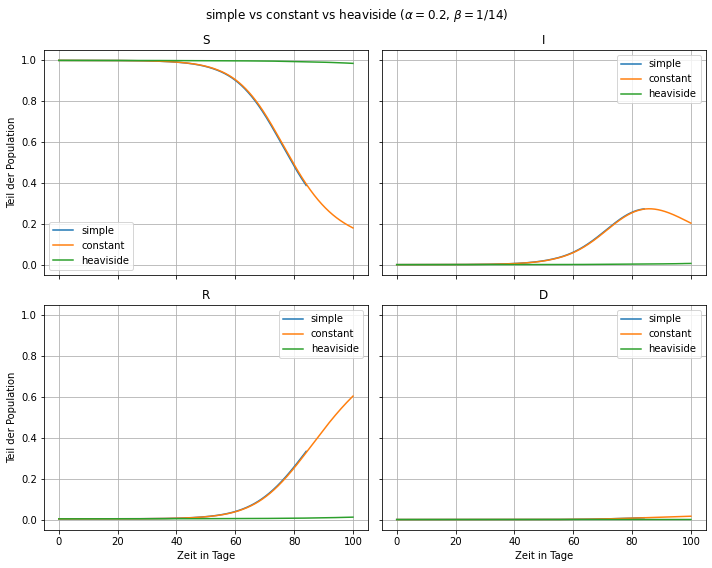

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
fig.suptitle(r"simple vs constant vs heaviside ($\alpha=0.2$, $\beta=1/14)$")

axs[0, 0].set_title("S")
axs[0, 0].set_ylabel("Teil der Population")
#axs[0, 0].plot(t, solsimple3_[:, 5], label="odeint")
axs[0, 0].plot(solsimple3.t, solsimple3.y[5, :], label="simple")
axs[0, 0].plot(t, solconst.y[5, :], label='constant')
axs[0, 0].plot(t, solheavi.y[5, :], label='heaviside')
axs[0, 0].grid()
axs[0, 0].legend()

axs[0, 1].set_title("I")
#axs[0, 1].plot(t, solsimple3_[:, 5+38], label="odeint")
axs[0, 1].plot(solsimple3.t, solsimple3.y[5+38, :], label="simple")
axs[0, 1].plot(t, solconst.y[5+38, :], label='constant')
axs[0, 1].plot(t, solheavi.y[5+38, :], label='heaviside')
axs[0, 1].grid()
axs[0, 1].legend()

axs[1, 0].set_title("R")
axs[1, 0].set_xlabel("Zeit in Tage")
axs[1, 0].set_ylabel("Teil der Population")
#axs[1, 0].plot(t, solsimple3_[:, 5+2*38], label="odeint")
axs[1, 0].plot(solsimple3.t, solsimple3.y[5+2*38, :], label="simple")
axs[1, 0].plot(t, solconst.y[5+2*38, :], label='constant')
axs[1, 0].plot(t, solheavi.y[5+2*38, :], label='heaviside')
axs[1, 0].grid()
axs[1, 0].legend()

axs[1, 1].set_title("D")
axs[1, 1].set_xlabel("Zeit in Tage")
#axs[1, 1].plot(t, solsimple3_[:, 5+3*38], label="odeint")
axs[1, 1].plot(solsimple3.t, solsimple3.y[5+3*38, :], label="simple")
axs[1, 1].plot(t, solconst.y[5+3*38, :], label='constant')
axs[1, 1].plot(t, solheavi.y[5+3*38, :], label='heaviside')
axs[1, 1].grid()
axs[1, 1].legend()

fig.tight_layout()
plt.show()

## Anfaengliches Verhalten

In [9]:
simulation001 = Data(0.4, 1/4, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])
simulation002 = Data(0.3, 1/4, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])
simulation003 = Data(0.2, 1/4, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])
simulation004 = Data(0.1, 1/4, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])

t = np.linspace(0, 10, 10000)

sol1 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "heaviside", tzero), t_eval=t, dense_output=True)
sol2 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "constant", tzero), t_eval=t, dense_output=True)
sol3 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation002, "heaviside", tzero), t_eval=t, dense_output=True)
sol4 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation002, "constant", tzero), t_eval=t, dense_output=True)
sol5 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation003, "heaviside", tzero), t_eval=t, dense_output=True)
sol6 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation003, "constant", tzero), t_eval=t, dense_output=True)
sol7 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation004, "heaviside", tzero), t_eval=t, dense_output=True)
sol8 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation004, "constant", tzero), t_eval=t, dense_output=True)

solsimple1 = [sci.solve_ivp(fun=simple_system, t_span=(0,100), y0=ic_simple[i], method="RK45", args=(simulation001,), t_eval=t, dense_output=True) for i in range(dimension)]
solsimple2 = [sci.solve_ivp(fun=simple_system, t_span=(0,100), y0=ic_simple[i], method="RK45", args=(simulation002,), t_eval=t, dense_output=True) for i in range(dimension)]
solsimple3 = [sci.solve_ivp(fun=simple_system, t_span=(0,100), y0=ic_simple[i], method="RK45", args=(simulation003,), t_eval=t, dense_output=True) for i in range(dimension)]
solsimple4 = [sci.solve_ivp(fun=simple_system, t_span=(0,100), y0=ic_simple[i], method="RK45", args=(simulation004,), t_eval=t, dense_output=True) for i in range(dimension)]

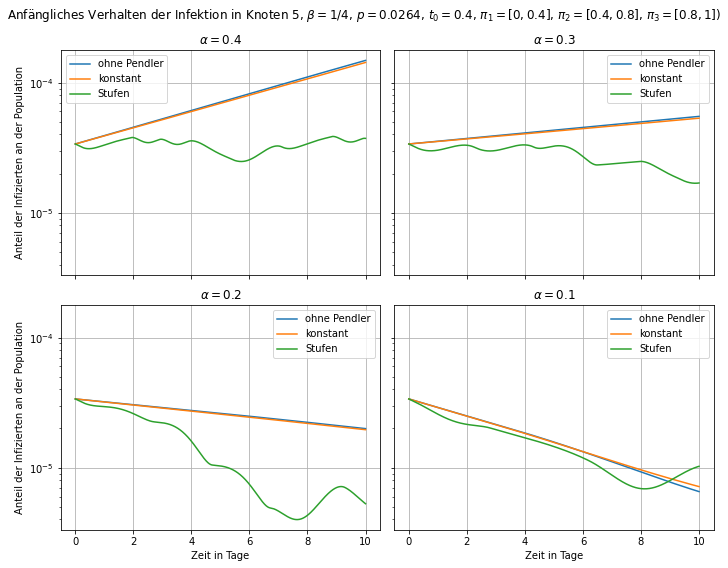

In [11]:
index = 5

fig, axs = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
fig.suptitle(r"Anfängliches Verhalten der Infektion in Knoten %g, $\beta = 1/4$, $p = 0.0264$, $t_0 = 0.4$, $\pi_1 = [0, 0.4]$, $\pi_2 = [0.4, 0.8]$, $\pi_3 = [0.8, 1]$)" % (index))

axs[0, 0].plot(solsimple1[index].t, solsimple1[index].y[1], label="ohne Pendler")
axs[0, 0].plot(sol2.t, sol2.y[dimension + index, :], label="konstant")
axs[0, 0].plot(sol1.t, sol1.y[dimension + index, :], label="Stufen")
axs[0, 0].grid()
axs[0, 0].legend()
axs[0, 0].set_yscale("log")
axs[0, 0].set_ylabel("Anteil der Infizierten an der Population")
axs[0, 0].set_title(r"$\alpha = 0.4$")

axs[0, 1].plot(solsimple2[index].t, solsimple2[index].y[1], label="ohne Pendler")
axs[0, 1].plot(sol4.t, sol4.y[dimension + index, :], label="konstant")
axs[0, 1].plot(sol3.t, sol3.y[dimension + index, :], label="Stufen")
axs[0, 1].grid()
axs[0, 1].legend()
axs[0, 1].set_yscale("log")
axs[0, 1].set_title(r"$\alpha = 0.3$")

axs[1, 0].plot(solsimple3[index].t, solsimple3[index].y[1], label="ohne Pendler")
axs[1, 0].plot(sol6.t, sol6.y[dimension + index, :], label="konstant")
axs[1, 0].plot(sol5.t, sol5.y[dimension + index, :], label="Stufen")
axs[1, 0].grid()
axs[1, 0].legend()
axs[1, 0].set_yscale("log")
axs[1, 0].set_xlabel("Zeit in Tage")
axs[1, 0].set_ylabel("Anteil der Infizierten an der Population")
axs[1, 0].set_title(r"$\alpha = 0.2$")

axs[1, 1].plot(solsimple4[index].t, solsimple4[index].y[1], label="ohne Pendler")
axs[1, 1].plot(sol8.t, sol8.y[dimension + index, :], label="konstant")
axs[1, 1].plot(sol7.t, sol7.y[dimension + index, :], label="Stufen")
axs[1, 1].grid()
axs[1, 1].legend()
axs[1, 1].set_yscale("log")
axs[1, 1].set_xlabel("Zeit in Tage")
axs[1, 1].set_title(r"$\alpha = 0.1$")

fig.tight_layout()

plt.savefig("./Media/Plots/exp/LogY01.pdf", dpi=300, bbox_inches="tight")

plt.show()

## Some Plotting

In [ ]:
# variation of alpha 

dimension = 38
b = np.genfromtxt("./Internal Data/initial_data.txt")

initCond = np.zeros(dimension*4)

for i in range(dimension):
    initCond[i] = b[i, 0]
    initCond[i + dimension] = b[i, 1]
    initCond[i + 2*dimension] = b[i, 2]
    initCond[i + 3*dimension] = b[i, 3]

ic_simple = [[b[i,j] for j in range(4)] for i in range(dimension)]
N = region_setup(dimension)[0]

simulation001 = Data(0.1, 1/5, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])
simulation002 = Data(0.2, 1/5, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])
simulation003 = Data(0.3, 1/5, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])
simulation004 = Data(0.4, 1/5, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])
simulation005 = Data(0.5, 1/5, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])

tzero = np.array([0, 0.4, 0.8])
t = np.linspace(0, 100, 100000)

solsimple1 = [sci.solve_ivp(fun=simple_system, t_span=(0,100), y0=ic_simple[i], method="RK45", args=(simulation001,), t_eval=t, dense_output=True) for i in range(dimension)]
solsimple2 = [sci.solve_ivp(fun=simple_system, t_span=(0,100), y0=ic_simple[i], method="RK45", args=(simulation002,), t_eval=t, dense_output=True) for i in range(dimension)]
solsimple3 = [sci.solve_ivp(fun=simple_system, t_span=(0,100), y0=ic_simple[i], method="RK45", args=(simulation003,), t_eval=t, dense_output=True) for i in range(dimension)]
solsimple4 = [sci.solve_ivp(fun=simple_system, t_span=(0,100), y0=ic_simple[i], method="RK45", args=(simulation004,), t_eval=t, dense_output=True) for i in range(dimension)]
solsimple5 = [sci.solve_ivp(fun=simple_system, t_span=(0,100), y0=ic_simple[i], method="RK45", args=(simulation005,), t_eval=t, dense_output=True) for i in range(dimension)]

'''
sol1 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "simple", tzero), t_eval=t, dense_output=True, vectorized=True)
sol2 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation002, "simple", tzero), t_eval=t, dense_output=True, vectorized=True)
sol3 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation003, "simple", tzero), t_eval=t, dense_output=True, vectorized=True)
sol4 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation004, "simple", tzero), t_eval=t, dense_output=True, vectorized=True)
sol5 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation005, "simple", tzero), t_eval=t, dense_output=True, vectorized=True)
'''

sol6 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "constant", tzero), t_eval=t, dense_output=True)
sol7 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation002, "constant", tzero), t_eval=t, dense_output=True)
sol8 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation003, "constant", tzero), t_eval=t, dense_output=True)
sol9 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation004, "constant", tzero), t_eval=t, dense_output=True)
sol10 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation005, "constant", tzero), t_eval=t, dense_output=True)

sol11 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "heaviside", tzero), t_eval=t, dense_output=True)
sol12 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation002, "heaviside", tzero), t_eval=t, dense_output=True)
sol13 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation003, "heaviside", tzero), t_eval=t, dense_output=True)
sol14 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation004, "heaviside", tzero), t_eval=t, dense_output=True)
sol15 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation005, "heaviside", tzero), t_eval=t, dense_output=True)

In [ ]:
# transform simple solutions into shape of constant/heaviside solutions

sol1 = np.zeros((4*dimension,len(t)))
sol2, sol3, sol4, sol5 = np.copy(sol1), np.copy(sol1), np.copy(sol1), np.copy(sol1)

for old, new in zip([solsimple1, solsimple2, solsimple3, solsimple4, solsimple5], [sol1, sol2, sol3, sol4, sol5]):
    for index in range(dimension):
        for j in range(4):
            for k in range(len(old[index].t)):
                new[index + j*dimension, k] = old[index].y[j][k]

In [ ]:
t3 = time.time()

def plotting_alpha(index, method='simple'):
    """Function for plotting the effect that alpha has on the differential equations
    Args:
        index (int): index of cell
        method (string): either 'simple', 'constant' or 'heaviside'
    """
    title = r'Zeitentwicklung in Knoten %g für verschiedene $\alpha$; $\beta = 1/5$, $p = 0.0264$, ' % (index)
    sols = [sol1, sol2, sol3, sol4, sol5]
    path = 'Media/Plots/alpha/simple/alphaplot_%g.pdf' % index

    if method == 'constant':
        title += r'konstanter Ansatz ($t_0 = 0.4$)'
        sols = [sol6.y, sol7.y, sol8.y, sol9.y, sol10.y]
        path = 'Media/Plots/alpha/constant/alphaplot_%g.pdf' % index
    elif method == 'heaviside':
        title += r'Stufen-Ansatz ($\pi_1 = [0, 0.4]$, $\pi_2 = [0.4, 0.8]$, $\pi_3 = [0.8, 1]$)'
        sols = [sol11.y, sol12.y, sol13.y, sol14.y, sol15.y]
        path = 'Media/Plots/alpha/heaviside/alphaplot_%g.pdf' % index
    else:
        title += 'ohne Pendlerdynamik'

    fig, axs = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
    fig.suptitle(title)

    axs[0, 0].set_title("Suszeptible S")
    axs[0, 0].set_ylabel("Anteil der Population")
    axs[0, 0].plot(t, sols[0][index, :], "b", label=r"$\alpha = 0.10$")
    axs[0, 0].plot(t, sols[1][index, :], "g", label=r"$\alpha = 0.20$")
    axs[0, 0].plot(t, sols[2][index, :], "r", label=r"$\alpha = 0.30$")
    axs[0, 0].plot(t, sols[3][index, :], "c", label=r"$\alpha = 0.40$")
    axs[0, 0].plot(t, sols[4][index, :], "m", label=r"$\alpha = 0.50$")
    axs[0, 0].legend()
    axs[0, 0].grid()


    axs[0, 1].set_title("Infizierte I")
    axs[0, 1].plot(t, sols[0][index + dimension, :], "b", label=r"$\alpha = 0.10$")
    axs[0, 1].plot(t, sols[1][index + dimension, :], "g", label=r"$\alpha = 0.20$")
    axs[0, 1].plot(t, sols[2][index + dimension, :], "r", label=r"$\alpha = 0.30$")
    axs[0, 1].plot(t, sols[3][index + dimension, :], "c", label=r"$\alpha = 0.40$")
    axs[0, 1].plot(t, sols[4][index + dimension, :], "m", label=r"$\alpha = 0.50$")
    axs[0, 1].legend()
    axs[0, 1].grid()


    axs[1, 0].set_title("Genesene R")
    axs[1, 0].set_xlabel("Zeit in Tage")
    axs[1, 0].set_ylabel("Anteil der Population")
    axs[1, 0].plot(t, sols[0][index + 2*dimension, :], "b", label=r"$\alpha = 0.10$")
    axs[1, 0].plot(t, sols[1][index + 2*dimension, :], "g", label=r"$\alpha = 0.20$")
    axs[1, 0].plot(t, sols[2][index + 2*dimension, :], "r", label=r"$\alpha = 0.30$")
    axs[1, 0].plot(t, sols[3][index + 2*dimension, :], "c", label=r"$\alpha = 0.40$")
    axs[1, 0].plot(t, sols[4][index + 2*dimension, :], "m", label=r"$\alpha = 0.50$")
    axs[1, 0].legend()
    axs[1, 0].grid()


    axs[1, 1].set_title("Verstorbene D")
    axs[1, 1].set_xlabel("Zeit in Tage")
    axs[1, 1].plot(t, sols[0][index + 3*dimension, :], "b", label=r"$\alpha = 0.10$")
    axs[1, 1].plot(t, sols[1][index + 3*dimension, :], "g", label=r"$\alpha = 0.20$")
    axs[1, 1].plot(t, sols[2][index + 3*dimension, :], "r", label=r"$\alpha = 0.30$")
    axs[1, 1].plot(t, sols[3][index + 3*dimension, :], "c", label=r"$\alpha = 0.40$")
    axs[1, 1].plot(t, sols[4][index + 3*dimension, :], "m", label=r"$\alpha = 0.50$")
    axs[1, 1].legend()
    axs[1, 1].grid()

    fig.tight_layout()
    plt.savefig(path, dpi=200, bbox_inches="tight")
    plt.close(fig)



if __name__ == "__main__":
    for i in range(dimension):
        plotting_alpha(i, 'simple')
        plotting_alpha(i, 'constant')
        plotting_alpha(i, 'heaviside')

    """

    pool = Pool(4)
    pool.map(plotting, range(38))
    
    arg = [(i,) for i in range(38)]
    print(tuple(arg))
    pool = ThreadPool(2)
    pool.starmap(plotting, arg) 
    pool.close() 
    pool.join()
    """

t4 = time.time()
print("The program took ", t4- t3, "s")

In [ ]:
# variation of beta

dimension = 38
initCond = np.zeros(dimension*4)

b = np.genfromtxt("./Internal Data/initial_data.txt")

for i in range(dimension):
    initCond[i] = b[i, 0]
    initCond[i + dimension] = b[i, 1]
    initCond[i + 2*dimension] = b[i, 2]
    initCond[i + 3*dimension] = b[i, 3]

ic_simple = [[b[i,j] for j in range(4)] for i in range(dimension)]
N = region_setup(dimension)[0]

simulation001 = Data(0.3, 1/3, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])
simulation002 = Data(0.3, 1/7, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])
simulation003 = Data(0.3, 1/10, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])
simulation004 = Data(0.3, 1/14, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])
simulation005 = Data(0.3, 1/21, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])

tzero = np.array([0, 0.4, 0.8])

t = np.linspace(0, 100, 100000)

solsimple1 = [sci.solve_ivp(fun=simple_system, t_span=(0,100), y0=ic_simple[i], method="RK45", args=(simulation001,), t_eval=t, dense_output=True) for i in range(dimension)]
solsimple2 = [sci.solve_ivp(fun=simple_system, t_span=(0,100), y0=ic_simple[i], method="RK45", args=(simulation002,), t_eval=t, dense_output=True) for i in range(dimension)]
solsimple3 = [sci.solve_ivp(fun=simple_system, t_span=(0,100), y0=ic_simple[i], method="RK45", args=(simulation003,), t_eval=t, dense_output=True) for i in range(dimension)]
solsimple4 = [sci.solve_ivp(fun=simple_system, t_span=(0,100), y0=ic_simple[i], method="RK45", args=(simulation004,), t_eval=t, dense_output=True) for i in range(dimension)]
solsimple5 = [sci.solve_ivp(fun=simple_system, t_span=(0,100), y0=ic_simple[i], method="RK45", args=(simulation005,), t_eval=t, dense_output=True) for i in range(dimension)]

sol6 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "constant", tzero), t_eval=t)
sol7 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation002, "constant", tzero), t_eval=t)
sol8 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation003, "constant", tzero), t_eval=t)
sol9 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation004, "constant", tzero), t_eval=t)
sol10 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation005, "constant", tzero), t_eval=t)

sol11 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "heaviside", tzero), t_eval=t)
sol12 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation002, "heaviside", tzero), t_eval=t)
sol13 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation003, "heaviside", tzero), t_eval=t)
sol14 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation004, "heaviside", tzero), t_eval=t)
sol15 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation005, "heaviside", tzero), t_eval=t)

In [ ]:
# transform simple solutions into shape of constant/heaviside solutions

sol1 = np.zeros((4*dimension,len(t)))
sol2, sol3, sol4, sol5 = np.copy(sol1), np.copy(sol1), np.copy(sol1), np.copy(sol1)

for old, new in zip([solsimple1, solsimple2, solsimple3, solsimple4, solsimple5], [sol1, sol2, sol3, sol4, sol5]):
    for index in range(dimension):
        for j in range(4):
            for k in range(len(old[index].t)):
                new[index + j*dimension, k] = old[index].y[j][k]

In [ ]:
t3 = time.time()

def plotting_beta(index, method='simple'):
    """Function for plotting the effect that beta has on the differential equations
    Args:
        index (int): index of cell
        method (string): either 'simple', 'constant' or 'heaviside'
    """
    title = r'Zeitentwicklung in Knoten %g für verschiedene $\beta$, $\alpha = 0.3$, $p = 0.0264$, ' % (index)
    sols = [sol1, sol2, sol3, sol4, sol5]
    path = 'Media/Plots/beta/simple/betaplot_%g.pdf' % index

    if method == 'constant':
        title += r'konstanter Ansatz ($t_0 = 0.4$)'
        sols = [sol6.y, sol7.y, sol8.y, sol9.y, sol10.y]
        path = 'Media/Plots/beta/constant/betaplot_%g.pdf' % index
    elif method == 'heaviside':
        title += r'Stufen-Ansatz ($\pi_1 = [0, 0.4]$, $\pi_2 = [0.4, 0.8]$, $\pi_3 = [0.8, 1]$)'
        sols = [sol11.y, sol12.y, sol13.y, sol14.y, sol15.y]
        path = 'Media/Plots/beta/heaviside/betaplot_%g.pdf' % index
    else:
        title += 'ohne Pendlerdynamik'

    fig, axs = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
    fig.suptitle(title)

    axs[0, 0].set_title("Suszeptible S")
    axs[0, 0].set_ylabel("Anteil der Population")
    axs[0, 0].plot(t, sols[0][index, :], "b", label=r"$\beta = 1/3$")
    axs[0, 0].plot(t, sols[1][index, :], "g", label=r"$\beta = 1/7$")
    axs[0, 0].plot(t, sols[2][index, :], "r", label=r"$\beta = 1/10$")
    axs[0, 0].plot(t, sols[3][index, :], "c", label=r"$\beta = 1/14$")
    axs[0, 0].plot(t, sols[4][index, :], "m", label=r"$\beta = 1/21$")
    axs[0, 0].legend()
    axs[0, 0].grid()


    axs[0, 1].set_title("Infizierte I")
    axs[0, 1].plot(t, sols[0][index + dimension, :], "b", label=r"$\beta = 1/3$")
    axs[0, 1].plot(t, sols[1][index + dimension, :], "g", label=r"$\beta = 1/7$")
    axs[0, 1].plot(t, sols[2][index + dimension, :], "r", label=r"$\beta = 1/10$")
    axs[0, 1].plot(t, sols[3][index + dimension, :], "c", label=r"$\beta = 1/14$")
    axs[0, 1].plot(t, sols[4][index + dimension, :], "m", label=r"$\beta = 1/21$")
    axs[0, 1].legend()
    axs[0, 1].grid()


    axs[1, 0].set_title("Genesene R")
    axs[1, 0].set_xlabel("Zeit in Tage")
    axs[1, 0].set_ylabel("Anteil der Population")
    axs[1, 0].plot(t, sols[0][index + 2*dimension, :], "b", label=r"$\beta = 1/3$")
    axs[1, 0].plot(t, sols[1][index + 2*dimension, :], "g", label=r"$\beta = 1/7$")
    axs[1, 0].plot(t, sols[2][index + 2*dimension, :], "r", label=r"$\beta = 1/10$")
    axs[1, 0].plot(t, sols[3][index + 2*dimension, :], "c", label=r"$\beta = 1/14$")
    axs[1, 0].plot(t, sols[4][index + 2*dimension, :], "m", label=r"$\beta = 1/21$")
    axs[1, 0].legend()
    axs[1, 0].grid()


    axs[1, 1].set_title("Verstorbene D")
    axs[1, 1].set_xlabel("Zeit in Tage")
    axs[1, 1].plot(t, sols[0][index + 3*dimension, :], "b", label=r"$\beta = 1/3$")
    axs[1, 1].plot(t, sols[1][index + 3*dimension, :], "g", label=r"$\beta = 1/7$")
    axs[1, 1].plot(t, sols[2][index + 3*dimension, :], "r", label=r"$\beta = 1/10$")
    axs[1, 1].plot(t, sols[3][index + 3*dimension, :], "c", label=r"$\beta = 1/14$")
    axs[1, 1].plot(t, sols[4][index + 3*dimension, :], "m", label=r"$\beta = 1/21$")
    axs[1, 1].legend()
    axs[1, 1].grid()

    fig.tight_layout()
    plt.savefig(path, dpi=200, bbox_inches="tight")
    plt.close(fig)




if __name__ == "__main__":
    for i in range(dimension):
        plotting_beta(i, 'simple')
        plotting_beta(i, 'constant')
        plotting_beta(i, 'heaviside')
    
    """

    pool = Pool(4)
    pool.map(plotting, range(38))
    
    arg = [(i,) for i in range(38)]
    print(tuple(arg))
    pool = ThreadPool(2)
    pool.starmap(plotting, arg) 
    pool.close() 
    pool.join()
    """

t4 = time.time()
print("The program took ", t4- t3, "s")

In [ ]:
# variation of t0 (constant coefficients)

dimension = 38
initCond = np.zeros(dimension*4)

b = np.genfromtxt("./Internal Data/initial_data.txt")

for i in range(dimension):
    initCond[i] = b[i, 0]
    initCond[i + dimension] = b[i, 1]
    initCond[i + 2*dimension] = b[i, 2]
    initCond[i + 3*dimension] = b[i, 3]

ic_simple = [[b[i,j] for j in range(4)] for i in range(dimension)]
N = region_setup(dimension)[0]
tzero = np.array([0, 0.4, 0.8])

t = np.linspace(0, 100, 100000)

simulation001 = Data(0.3, 1/5, dimension, "Pendler.txt", 6/24, import_rki_data(N, 7)[2])
simulation002 = Data(0.3, 1/5, dimension, "Pendler.txt", 8/24, import_rki_data(N, 7)[2])
simulation003 = Data(0.3, 1/5, dimension, "Pendler.txt", 10/24, import_rki_data(N, 7)[2])
simulation004 = Data(0.3, 1/5, dimension, "Pendler.txt", 12/24, import_rki_data(N, 7)[2])
simulation005 = Data(0.3, 1/5, dimension, "Pendler.txt", 14/24, import_rki_data(N, 7)[2])

sol1 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "constant", tzero), t_eval=t)
sol2 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation002, "constant", tzero), t_eval=t)
sol3 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation003, "constant", tzero), t_eval=t)
sol4 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation004, "constant", tzero), t_eval=t)
sol5 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation005, "constant", tzero), t_eval=t)

In [ ]:
t3 = time.time()

def plotting_t0(index):
    """Function for plotting the effect that the parameter t0 has (method='constant')
    Args:
        index (int): index of cell
    """
    fig, axs = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
    fig.suptitle(r"Zeitentwicklung in Knoten %g für verschiedene $t_0$ im konstanten Ansatz; $\alpha = 0.3$, $\beta = 1/5$, $p = 0.0264$" % (index))

    axs[0, 0].set_title("Suszeptible S")
    axs[0, 0].set_ylabel("Anteil der Population")
    axs[0, 0].plot(sol1.t, sol1.y[index, :], "b", label=r"$t_0 = 6/24$")
    axs[0, 0].plot(sol2.t, sol2.y[index, :], "g", label=r"$t_0 = 8/24$")
    axs[0, 0].plot(sol3.t, sol3.y[index, :], "r", label=r"$t_0 = 10/24$")
    axs[0, 0].plot(sol4.t, sol4.y[index, :], "c", label=r"$t_0 = 12/24$")
    axs[0, 0].plot(sol5.t, sol5.y[index, :], "m", label=r"$t_0 = 14/24$")
    axs[0, 0].legend()
    axs[0, 0].grid()


    axs[0, 1].set_title("Infizierte I")
    axs[0, 1].plot(sol1.t, sol1.y[index + dimension, :], "b", label=r"$t_0 = 6/24$")
    axs[0, 1].plot(sol2.t, sol2.y[index + dimension, :], "g", label=r"$t_0 = 8/24$")
    axs[0, 1].plot(sol3.t, sol3.y[index + dimension, :], "r", label=r"$t_0 = 10/24$")
    axs[0, 1].plot(sol4.t, sol4.y[index + dimension, :], "c", label=r"$t_0 = 12/24$")
    axs[0, 1].plot(sol5.t, sol5.y[index + dimension, :], "m", label=r"$t_0 = 14/24$")
    axs[0, 1].legend()
    axs[0, 1].grid()


    axs[1, 0].set_title("Genesene R")
    axs[1, 0].set_xlabel("Zeit in Tage")
    axs[1, 0].set_ylabel("Anteil der Population")
    axs[1, 0].plot(sol1.t, sol1.y[index + 2*dimension, :], "b", label=r"$t_0 = 6/24$")
    axs[1, 0].plot(sol2.t, sol2.y[index + 2*dimension, :], "g", label=r"$t_0 = 8/24$")
    axs[1, 0].plot(sol3.t, sol3.y[index + 2*dimension, :], "r", label=r"$t_0 = 10/24$")
    axs[1, 0].plot(sol4.t, sol4.y[index + 2*dimension, :], "c", label=r"$t_0 = 12/24$")
    axs[1, 0].plot(sol5.t, sol5.y[index + 2*dimension, :], "m", label=r"$t_0 = 14/24$")
    axs[1, 0].legend()
    axs[1, 0].grid()


    axs[1, 1].set_title("Verstorbene D")
    axs[1, 1].set_xlabel("Zeit in Tage")
    axs[1, 1].plot(sol1.t, sol1.y[index + 3*dimension, :], "b", label=r"$t_0 = 6/24$")
    axs[1, 1].plot(sol2.t, sol2.y[index + 3*dimension, :], "g", label=r"$t_0 = 8/24$")
    axs[1, 1].plot(sol3.t, sol3.y[index + 3*dimension, :], "r", label=r"$t_0 = 10/24$")
    axs[1, 1].plot(sol4.t, sol4.y[index + 3*dimension, :], "c", label=r"$t_0 = 12/24$")
    axs[1, 1].plot(sol5.t, sol5.y[index + 3*dimension, :], "m", label=r"$t_0 = 14/24$")
    axs[1, 1].legend()
    axs[1, 1].grid()

    fig.tight_layout()
    plt.savefig("./Media/Plots/t0/t0plot_%g.pdf" % index, dpi=200)
    plt.close(fig)


if __name__ == "__main__":
    for i in range(dimension):
        plotting_t0(i)
    
    """
    pool = Pool(4)
    pool.map(plotting, range(38))
    """
    """
    arg = [(i,) for i in range(38)]
    print(tuple(arg))
    pool = ThreadPool(2)
    pool.starmap(plotting, arg) 
    pool.close() 
    pool.join()
    """
    
t4 = time.time()
print("The program took ", t4- t3, "s")

In [12]:
# variation of heaviside-intervals

dimension = 38
initCond = np.zeros(dimension*4)

b = np.genfromtxt("./Internal Data/initial_data.txt")

for i in range(dimension):
    initCond[i] = b[i, 0]
    initCond[i + dimension] = b[i, 1]
    initCond[i + 2*dimension] = b[i, 2]
    initCond[i + 3*dimension] = b[i, 3]

ic_simple = [[b[i,j] for j in range(4)] for i in range(dimension)]
N = region_setup(dimension)[0]

tzero1 = np.array([0, 0.4, 0.6])
tzero2 = np.array([0, 0.4, 0.7])
tzero3 = np.array([0, 0.4, 0.8])
tzero4 = np.array([0, 0.4, 0.9])
tzero5 = np.array([0, 0.4, 1.0])

simulation001 = Data(0.4, 1/7, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])

t = np.linspace(0, 100, 100000)

sol1 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "heaviside", tzero1), t_eval=t)
sol2 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "heaviside", tzero2), t_eval=t)
sol3 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "heaviside", tzero3), t_eval=t)
sol4 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "heaviside", tzero4), t_eval=t)
sol5 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "heaviside", tzero5), t_eval=t)

In [13]:
t3 = time.time()

def plotting_part(index):
    """Function for plotting the effect that the heaviside intervals have
    Args:
        index (int): index of cell
    """
    fig, axs = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
    fig.suptitle(r"Zeitentwicklung in Knoten %g für verschiedene $\pi_1$, $\pi_2$ & $\pi_3$ im Stufen-Ansatz; $\alpha = 0.4$, $\beta = 1/4$, $p = 0.0264$" % (index))

    axs[0, 0].set_title("Suszeptible S")
    axs[0, 0].set_ylabel("Anteil der Population")
    axs[0, 0].plot(sol1.t, sol1.y[index, :], "b", label=r"$[0, 0.4, 0.6]$")
    axs[0, 0].plot(sol2.t, sol2.y[index, :], "g", label=r"$[0, 0.4, 0.7]$")
    axs[0, 0].plot(sol3.t, sol3.y[index, :], "r", label=r"$[0, 0.4, 0.8]$")
    axs[0, 0].plot(sol4.t, sol4.y[index, :], "c", label=r"$[0, 0.4, 0.9]$")
    axs[0, 0].plot(sol5.t, sol5.y[index, :], "m", label=r"$[0, 0.4, 1.0]$")
    axs[0, 0].legend()
    axs[0, 0].grid()


    axs[0, 1].set_title("Infizierte I")
    axs[0, 1].plot(sol1.t, sol1.y[index + dimension, :], "b", label=r"$[0, 0.4, 0.6]$")
    axs[0, 1].plot(sol2.t, sol2.y[index + dimension, :], "g", label=r"$[0, 0.4, 0.7]$")
    axs[0, 1].plot(sol3.t, sol3.y[index + dimension, :], "r", label=r"$[0, 0.4, 0.8]$")
    axs[0, 1].plot(sol4.t, sol4.y[index + dimension, :], "c", label=r"$[0, 0.4, 0.9]$")
    axs[0, 1].plot(sol5.t, sol5.y[index + dimension, :], "m", label=r"$[0, 0.4, 1.0]$")
    axs[0, 1].legend()
    axs[0, 1].grid()


    axs[1, 0].set_title("Genesene R")
    axs[1, 0].set_xlabel("Zeit in Tage")
    axs[1, 0].set_ylabel("Anteil der Population")
    axs[1, 0].plot(sol1.t, sol1.y[index + 2*dimension, :], "b", label=r"$[0, 0.4, 0.6]$")
    axs[1, 0].plot(sol2.t, sol2.y[index + 2*dimension, :], "g", label=r"$[0, 0.4, 0.7]$")
    axs[1, 0].plot(sol3.t, sol3.y[index + 2*dimension, :], "r", label=r"$[0, 0.4, 0.8]$")
    axs[1, 0].plot(sol4.t, sol4.y[index + 2*dimension, :], "c", label=r"$[0, 0.4, 0.9]$")
    axs[1, 0].plot(sol5.t, sol5.y[index + 2*dimension, :], "m", label=r"$[0, 0.4, 1.0]$")
    axs[1, 0].legend()
    axs[1, 0].grid()


    axs[1, 1].set_title("Verstorbene D")
    axs[1, 1].set_xlabel("Zeit in Tage")
    axs[1, 1].plot(sol1.t, sol1.y[index + 3*dimension, :], "b", label=r"$[0, 0.4, 0.6]$")
    axs[1, 1].plot(sol2.t, sol2.y[index + 3*dimension, :], "g", label=r"$[0, 0.4, 0.7]$")
    axs[1, 1].plot(sol3.t, sol3.y[index + 3*dimension, :], "r", label=r"$[0, 0.4, 0.8]$")
    axs[1, 1].plot(sol4.t, sol4.y[index + 3*dimension, :], "c", label=r"$[0, 0.4, 0.9]$")
    axs[1, 1].plot(sol5.t, sol5.y[index + 3*dimension, :], "m", label=r"$[0, 0.4, 1.0]$")
    axs[1, 1].legend()
    axs[1, 1].grid()

    fig.tight_layout()
    plt.savefig("./Media/Plots/part/partplot_%g.pdf" % index, dpi=200)
    plt.close(fig)


if __name__ == "__main__":
    for i in range(dimension):
        plotting_part(i)
    
    """
    pool = Pool(4)
    pool.map(plotting, range(38))
    """
    """
    arg = [(i,) for i in range(38)]
    print(tuple(arg))
    pool = ThreadPool(2)
    pool.starmap(plotting, arg) 
    pool.close() 
    pool.join()
    """
    
t4 = time.time()
print("The program took ", t4- t3, "s")

The program took  79.03263521194458 s


# Small coefficients

In [34]:
dimension = 38
a =  np.loadtxt("./Internal Data/initial_data.txt")
initCond = np.zeros(dimension*4)

b = np.genfromtxt("./Internal Data/initial_data.txt")


for i in range(dimension):
    initCond[i] = b[i, 0]
    initCond[i + dimension] = b[i, 1]
    initCond[i + 2*dimension] = b[i, 2]
    initCond[i + 3*dimension] = b[i, 3]

ic_simple = [[b[i,j] for j in range(4)] for i in range(dimension)]
N = region_setup(dimension)[0]

tzero = np.array([0, 0.4, 0.8])


simulation001 = Data(0.001, 1/14, dimension, "Pendler.txt", 0.4, import_rki_data(N, 7)[2])

t = np.linspace(0, 100, 100000)

solsimple = [sci.solve_ivp(fun=simple_system, t_span=(0,100), y0=ic_simple[i], method="RK45", args=(simulation001,), t_eval=t, dense_output=True) for i in range(dimension)]
sol1 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "heaviside", tzero,), t_eval=t)
sol2 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "constant", tzero,), t_eval=t, dense_output=True)

""""
fig = plt.figure(figsize=(9, 7))
#plt.plot(sol.t[:10000], sol.y[43, :10000], label="const")
#plt.plot(sol1.t[:10000], sol1.y[43, :10000], label="heavi")
plt.plot(sol.t[:], sol.y[5+3*38, :], label="const")
plt.plot(sol1.t[:], sol1.y[5+3*38, :], label="heavi")
plt.legend(loc="upper left")
plt.grid()
plt.yscale("log")
plt.xlabel("Zeit in Tage")
plt.ylabel("Anteil der Population")
plt.show()


"""

'"\nfig = plt.figure(figsize=(9, 7))\n#plt.plot(sol.t[:10000], sol.y[43, :10000], label="const")\n#plt.plot(sol1.t[:10000], sol1.y[43, :10000], label="heavi")\nplt.plot(sol.t[:], sol.y[5+3*38, :], label="const")\nplt.plot(sol1.t[:], sol1.y[5+3*38, :], label="heavi")\nplt.legend(loc="upper left")\nplt.grid()\nplt.yscale("log")\nplt.xlabel("Zeit in Tage")\nplt.ylabel("Anteil der Population")\nplt.show()\n\n\n'

In [35]:
for index in range(dimension):

    fig, axs = plt.subplots(2, 2, figsize=(10,8), sharex=True)
    fig.suptitle(r"Vergleich der Modelle in Knoten %g für $\alpha = 0.001$, $\beta = 1/14$, $t_0 = 0.4$, $\pi_1 = [0, 0.4]$, $\pi_2 = [0.4, 0.8]$, $\pi_3 = [0.8, 1]$" % index)

    axs[0, 0].set_title("Suszeptible S")
    axs[0, 0].set_ylabel("Anteil der Population")
    axs[0, 0].set_yscale("log")
    axs[0, 0].plot(solsimple[index].t, solsimple[index].y[0], "b", label="ohne Pendler")
    axs[0, 0].plot(sol2.t, sol2.y[index, :], "g", label="konstant")
    axs[0, 0].plot(sol1.t, sol1.y[index, :], "r", label="Stufen")
    axs[0, 0].legend()
    axs[0, 0].grid()


    axs[0, 1].set_title("Infizierte I")
    axs[0, 1].set_yscale("log")
    axs[0, 1].plot(solsimple[index].t, solsimple[index].y[1], "b", label="ohne Pendler")
    axs[0, 1].plot(sol2.t, sol2.y[index + dimension, :], "g", label="konstant")
    axs[0, 1].plot(sol1.t, sol1.y[index + dimension, :], "r", label="Stufen")
    axs[0, 1].legend()
    axs[0, 1].grid()


    axs[1, 0].set_title("Genesene R")
    axs[1, 0].set_xlabel("Zeit in Tage")
    axs[1, 0].set_ylabel("Anteil der Population")
    axs[1, 0].set_yscale("log")
    axs[1, 0].plot(solsimple[index].t, solsimple[index].y[2], "b", label="ohne Pendler")
    axs[1, 0].plot(sol2.t, sol2.y[index + 2*dimension, :], "g", label="konstant")
    axs[1, 0].plot(sol1.t, sol1.y[index + 2*dimension, :], "r", label="Stufen")
    axs[1, 0].legend()
    axs[1, 0].grid()


    axs[1, 1].set_title("Verstorbene D")
    axs[1, 1].set_xlabel("Zeit in Tage")
    axs[1, 1].set_yscale("log")
    axs[1, 1].plot(solsimple[index].t, solsimple[index].y[3], "b", label="ohne Pendler")
    axs[1, 1].plot(sol2.t, sol2.y[index + 3*dimension, :], "g", label="konstant")
    axs[1, 1].plot(sol1.t, sol1.y[index + 3*dimension, :], "r", label="Stufen")
    axs[1, 1].legend()
    axs[1, 1].grid()

    fig.tight_layout()
    plt.savefig("./Media/Plots/small/smallplot_%g.pdf" % index, dpi=200)#
    plt.close(fig)

<ipython-input-35-61607a18f672>:45: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.tight_layout()


In [15]:
adj_heavi = np.log(sol1.y[5 + dimension, :])
adj_const = np.log(sol2.y[5 + dimension, :])

def fit_func(x, a, b):
    return a * x + b

N = int(4 / 5 * len(t))

print(N)

par_heavi, cov_heavi = opt.curve_fit(fit_func, t[:N], adj_heavi[:N])
par_const, cov_const = opt.curve_fit(fit_func, t[:N], adj_const[:N])

print("heaviside coefficients are: ", par_heavi)
print("const coefficients are", par_const)

80000
heaviside coefficients are:  [ 0.12652564 -9.32786796]
const coefficients are [ 0.12804983 -9.56738026]


## The theory behind it

Using the approximation $S_i = 1\space∀i$, the equation becomes
$
\begin{align}
    \bold{\dot{I}} = \bold{W}\bold{I}
\end{align}
$
where $\bold{W}$ is a matrix.

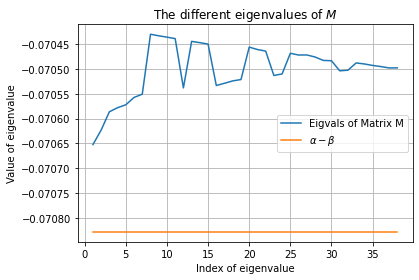

No handles with labels found to put in legend.


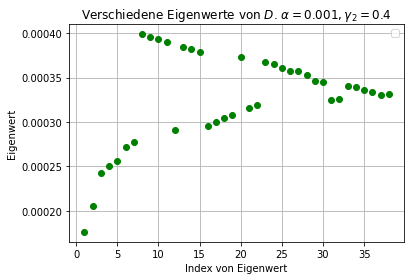

NameError: name 'eigvaluesW' is not defined

<Figure size 432x288 with 0 Axes>

In [18]:
# the matrix w

def matrixM(cl):

    M = np.array([np.zeros(cl.dimension) for i in range(cl.dimension)])
    gamma2 = 1 - cl.commuters_day

    P = cl.commuters
    Nr = np.array([remaining_population(cl.commutersFrom, cl.N, i) for i in range(cl.dimension)])
    


    sumba = np.array([np.zeros(cl.dimension) for i in range(cl.dimension)])
    for i in range(cl.dimension):
        for j in range(cl.dimension):
                for l in range(cl.dimension):
                    sumba[i, j] += P[l, i] * P[l, j] / (Nr[l] + sum(P[l, :]))
                sumba[i, j] *= 1.0 / cl.N[i]


    for i in range(cl.dimension):
        for j in range(cl.dimension):
            if (i == j):
                M[i, j] = cl.alpha * (cl.commuters_day + gamma2 * Nr[i]**2 / (cl.N[i] * (Nr[i] + sum(P[i, :])))) - cl.beta
            elif (i != j):
                M[i, j] = cl.alpha * gamma2 * (P[i, j] * Nr[i] / (cl.N[i] * (Nr[i] + sum(P[i, :]))) + P[j, i] * Nr[j] / (cl.N[i] * (Nr[j] + sum(P[j, :]))) + sumba[i, j])
    
    return M



def matrixD(cl):

    D = np.array([np.zeros(cl.dimension) for i in range(cl.dimension)])
    gamma2 = 1 - cl.commuters_day

    P = cl.commuters
    Nr = np.array([remaining_population(cl.commutersFrom, cl.N, i) for i in range(cl.dimension)])
    


    sumba = np.array([np.zeros(cl.dimension) for i in range(cl.dimension)])
    for i in range(cl.dimension):
        for j in range(cl.dimension):
                for l in range(cl.dimension):
                    sumba[i, j] += P[l, i] * P[l, j] / (Nr[l] + sum(P[l, :]))
                sumba[i, j] *= 1.0 / cl.N[i]


    for i in range(cl.dimension):
        for j in range(cl.dimension):
            if (i == j):
                D[i, j] = cl.alpha * (gamma2 * Nr[i]**2 / (cl.N[i] * (Nr[i] + sum(P[i, :]))))
            elif (i != j):
                D[i, j] = cl.alpha * gamma2 * (P[i, j] * Nr[i] / (cl.N[i] * (Nr[i] + sum(P[i, :]))) + P[j, i] * Nr[j] / (cl.N[i] * (Nr[j] + sum(P[j, :]))) + sumba[i, j])
    
    return D


def matrixM_HEAVI(cl, gamma1):

    W = np.array([np.zeros(cl.dimension) for i in range(cl.dimension)])
    gamma2 = 1 - gamma1

    P = cl.commuters
    Nr = np.array([remaining_population(cl.commutersFrom, cl.N, i) for i in range(cl.dimension)])
    


    sumba = np.array([np.zeros(cl.dimension) for i in range(cl.dimension)])
    for i in range(cl.dimension):
        for j in range(cl.dimension):
                for l in range(cl.dimension):
                    sumba[i, j] += P[l, i] * P[l, j] / (Nr[l] + sum(P[l, :]))
                sumba[i, j] *= 1.0 / cl.N[i]


    for i in range(cl.dimension):
        for j in range(cl.dimension):
            if (i == j):
                W[i, j] = cl.alpha * (gamma1 + gamma2 * Nr[i]**2 / (cl.N[i] * (Nr[i] + sum(P[i, :])))) - cl.beta
            elif (i != j):
                W[i, j] = cl.alpha * gamma2 * (P[j, i] * Nr[i] / (cl.N[i] * (Nr[i] + sum(P[i, :]))) + P[j, i] * Nr[j] / (cl.N[i] * (Nr[j] + sum(P[j, :]))) + sumba[i, j])
    
    return W







dimension = 38

reg = region_setup(dimension)[0]
N = import_rki_data(reg, 7)[2]


small = Data(0.001, 1/14, dimension, "Pendler.txt", 0.6, N)


Mat = matrixM(small)

D = matrixD(small)


eigvalues = np.linalg.eigvals(Mat)
eigvaluesD = np.linalg.eigvals(D)

nr = np.array([i for i in range(1, 39, 1)])

ew = np.ones(small.dimension) * (small.commuters_day * small.alpha - small.beta)

plt.figure(1)
plt.plot(nr, eigvalues, label="Eigvals of Matrix M")
plt.plot(nr, ew, label=r"$\alpha - \beta$")
plt.grid()
plt.legend()
plt.xlabel("Index of eigenvalue")
plt.ylabel("Value of eigenvalue")
plt.title(r"The different eigenvalues of $M$")
plt.show()



plt.figure(2)
plt.plot(nr, eigvaluesD, "og")
plt.grid()
plt.legend()
plt.xlabel("Index von Eigenwert")
plt.ylabel("Eigenwert")
plt.title(r"Verschiedene Eigenwerte von $D$. $\alpha = 0.001, \gamma_2 = 0.4$")
plt.savefig("./Media/Plots/small/EigenW.pdf", dpi=200, bbox_inches="tight")
plt.show()


plt.figure(3)
plt.plot(nr, eigvalues-eigvaluesW, label="Eigvals of Matrix W")
plt.plot(nr, ew, label=r"$\alpha - \beta$")
plt.grid()
plt.legend()
plt.xlabel("Index of eigenvalue")
plt.ylabel("Value of eigenvalue")
plt.title(r"The different eigenvalues of $W$")
plt.show()


E = np.linalg.eigvals(matrixM_HEAVI(small, 0.0))
plt.figure(4)
plt.plot(nr, E, label="Eigvals of Matrix W")
plt.plot(nr, ew, label=r"$\alpha - \beta$")
plt.grid()
plt.legend()
plt.xlabel("Index of eigenvalue")
plt.ylabel("Value of eigenvalue")
plt.title(r"The different eigenvalues of $W$")
plt.show()

# Boundaries

## Preparations, Sim Runs

### Optimal Parameters, Note that Optimization for LK Göttingen is used all over the following section if not explicitly commented otherwise

In [7]:
# Optimal alpha

alpha_opt_h = 0.48604165
alpha_sigma_h = 0 #0.01618935285000426
alpha_optmin_h = alpha_opt_h-alpha_sigma_h
alpha_optmax_h = alpha_opt_h+alpha_sigma_h

# Optimal beta
beta_opt_h = 0.26248485 
beta_sigma_h = 0 #0.06466687603697135
beta_optmin_h = beta_opt_h-beta_sigma_h
beta_optmax_h = beta_opt_h+beta_sigma_h

### Optimized 38

In [8]:
dimension = 38
a =  np.loadtxt("./Internal Data/initial_data.txt")
initCond = np.zeros(dimension*4)

b = np.genfromtxt("./Internal Data/initial_data.txt")


for i in range(dimension):
    initCond[i] = b[i, 0]
    initCond[i + dimension] = b[i, 1]
    initCond[i + 2*dimension] = b[i, 2]
    initCond[i + 3*dimension] = b[i, 3]

 
N = region_setup(dimension)[0]


tzero = np.array([0, 0.4, 0.8])
XX =  import_rki_data(N, 7)[2]
simulation001 = Data(alpha_opt_h, beta_opt_h,38, "Pendler.txt", 0.6, XX)

t = np.linspace(0, 100, 10000)

# KEY:
# sol(1=heaviside, otherwise=const)_(number of lks)_attributes

sol1_38 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "heaviside", tzero), t_eval=t)

sol_38 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation001, "constant", tzero), t_eval=t, dense_output=True)

## Optimized 38 (for all LKs, not only Göttingen)

In [9]:
dimension = 38
a =  np.loadtxt("./Internal Data/initial_data.txt")
initCond = np.zeros(dimension*4)

b = np.genfromtxt("./Internal Data/initial_data.txt")


for i in range(dimension):
    initCond[i] = b[i, 0]
    initCond[i + dimension] = b[i, 1]
    initCond[i + 2*dimension] = b[i, 2]
    initCond[i + 3*dimension] = b[i, 3]

 
N = region_setup(dimension)[0]


tzero = np.array([0, 0.4, 0.8])
XX =  import_rki_data(N, 7)[2]
simulation_all = Data(0.44506836, 0.25511719,38, "Pendler.txt", 0.6, XX)

t = np.linspace(0, 100, 10000)

# KEY:
# sol(1=heaviside, otherwise=const)_(number of lks)_attributes

sol1_38_all = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation_all, "heaviside", tzero), t_eval=t)

#sol_38_all = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation_all, "constant", tzero), t_eval=t, dense_output=True)

### Optimized 12

In [10]:
dimension = 12
a =  np.loadtxt("./Internal Data/initial_data.txt")
initCond = np.zeros(dimension*4)

b = np.genfromtxt("./Internal Data/initial_data.txt")


for i in range(dimension):
    initCond[i] = b[i, 0]
    initCond[i + dimension] = b[i, 1]
    initCond[i + 2*dimension] = b[i, 2]
    initCond[i + 3*dimension] = b[i, 3]

 
N = region_setup(dimension)[0]


tzero = np.array([0, 0.4, 0.8])

simulation002 = Data(0.33565674, 0.18297201,12, "Pendler.txt", 0.6, import_rki_data(N, 7)[2])

t = np.linspace(0, 100, 10000)

sol1_12 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation002, "heaviside", tzero), t_eval=t)
sol_12 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation002, "constant", tzero), t_eval=t, dense_output=True)

### Optimized 1

In [11]:
dimension = 1
a =  np.loadtxt("./Internal Data/initial_data.txt")
initCond = np.zeros(4)

b = np.genfromtxt("./Internal Data/initial_data.txt")


initCond[0] = b[5, 0]
initCond[1] = b[5, 1]
initCond[2] = b[5, 2]
initCond[3] = b[5, 3]

 
N = region_setup(dimension)[0]


tzero = np.array([0, 0.4, 0.8])

simulation003 = Data(0.03218687, 0.00024498,1, "Pendler.txt", 0.6, import_rki_data(N, 7)[2])

t = np.linspace(0, 100, 10000)

sol1_1 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation003, "heaviside", tzero), t_eval=t)
sol_1 = sci.solve_ivp(fun=function_of_system, t_span=(0, 100), y0=initCond, method="RK45", args=(simulation003, "constant", tzero), t_eval=t, dense_output=True)

In [187]:
# Degree Distribution

pendler = np.loadtxt("Pendler.txt")
degree_dist = np.zeros((38))
for i in range(38):
    for j in range (38):
        if(pendler[i][j] != 0):
            degree_dist[i] += 1
            degree_dist[j] += 1

def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

bmatrix(pendler)


'\\begin{bmatrix}\n  0. & 1705. & 1316. & ... & 560. & 739. & 2136.\\\\\n  805. & 0. & 0. & ... & 0. & 0. & 0.\\\\\n  802. & 0. & 0. & ... & 443. & 873. & 0.\\\\\n  ...\\\\\n  1410. & 0. & 2225. & ... & 0. & 6268. & 10323.\\\\\n  1905. & 0. & 2667. & ... & 4361. & 0. & 4844.\\\\\n  1372. & 0. & 173. & ... & 1919. & 1427. & 0.\\\\\n\\end{bmatrix}'

## Analysis for Region 38 (by degree distribution)

In [174]:
# NEU:

def find_sol_on_days_(solt, soly, lk_indzies, number_of_days, number_of_Lks, results_type = 0):
    # returns X[Landkreis][Tag]  S for results_type = 0, I for results_type = 1, R for results_type=2
    # and D for results_type=3
    start_punkt = results_type * number_of_Lks
    if not lk_indzies: 
        # if list is empty, simulation is calculated for all regions 
        S=np.empty((number_of_Lks,number_of_days+1), dtype=float, order='C')
        for l in range(number_of_Lks):
            k = l + start_punkt
            i=0
            goodtime=0
            for time in range(len(solt)):
                if abs(solt[time]-i)<1e-2:
                    goodtime=time
                    if time+1 <len(solt):
                        if abs(solt[time+1]-i)<abs(solt[time]-i):
                            goodtime=time+1
                    S[l][i]=soly[k][goodtime]
                    i=i+1
    else: # simulation is calculaten for specified regions
        number_of_Lks = len(lk_indzies)
        S = np.empty((number_of_Lks,number_of_days+1), dtype=float, order='C')
        for l in range(number_of_Lks):
            k = lk_indzies[l]
            k = k +start_punkt
            i=0
            goodtime=0
            for time in range(len(solt)):
                if abs(solt[time]-i)<1e-2:
                    goodtime=time
                    if time+1 <len(solt):
                        if abs(solt[time+1]-i)<abs(solt[time]-i):
                            goodtime=time+1
                    S[l][i]=soly[k][goodtime]
                    i=i+1
    return S ## returns X[Landkreis][Tag]

In [175]:
RKI_data = np.load("Internal Data/timeline.npy")
heavi_S_data = find_sol_on_days_(sol1_38_all.t,sol1_38_all.y, [],100,38,0)
heavi_I_data = find_sol_on_days_(sol1_38_all.t,sol1_38_all.y, [],100,38,1)
heavi_R_data = find_sol_on_days_(sol1_38_all.t,sol1_38_all.y, [],100,38,2)
heavi_D_data = find_sol_on_days_(sol1_38_all.t,sol1_38_all.y, [],100,38,3)
heavi_data = np.array([heavi_S_data, heavi_I_data, heavi_R_data, heavi_D_data])

In [176]:
def total_variance_for_boundaries(simulated_data, real_data):
    var = np.zeros(38)
    for t in range(100):
        for l in range(38):
            for m in range(4):
                var[l] += (real_data[l][m][t] - simulated_data[m][l][t])**2
    return var


In [177]:
heavi_I_var = total_variance_for_boundaries(heavi_data, RKI_data)/400 #average quadratic difference in each time step and compartment

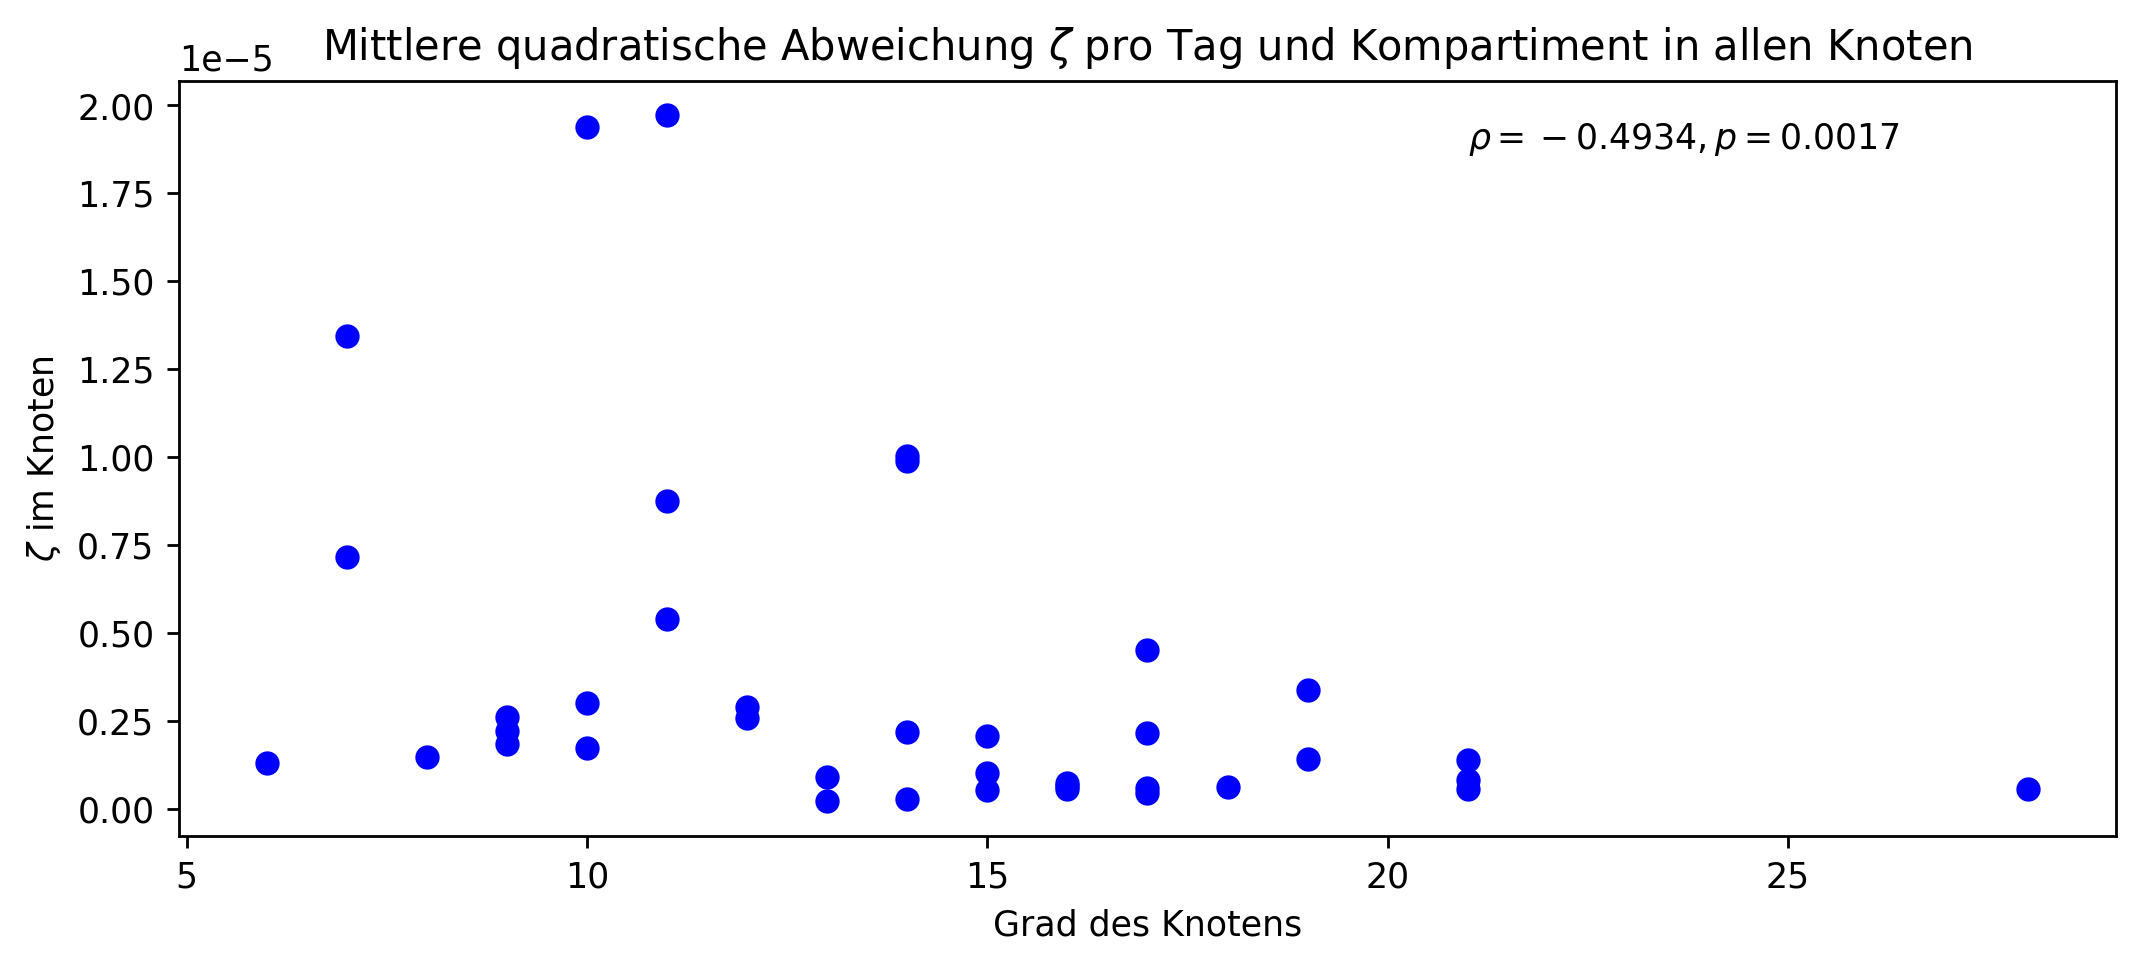

In [178]:


# Regression

def fh(x, a, b): 
	return a*x+b
p0 = [0, 0.1]
fith, errh = opt.curve_fit(fh, degree_dist, heavi_I_var, p0)

plt.figure(figsize=(10,4),dpi=250)
plt.title(r"Mittlere quadratische Abweichung $\zeta$ pro Tag und Kompartiment in allen Knoten")
plt.xlabel('Grad des Knotens')
plt.ylabel(r"$\zeta$ im Knoten")
plt.scatter(degree_dist, heavi_I_var,marker='o',color='blue')
plt.text(21,0.0075/400, r"$\rho=-0.4934, p=0.0017$")
#plt.plot(np.linspace(5,25,500), fh(np.linspace(5,25,500), *fith), label="Regression",color='red')
#plt.legend(loc='upper right')
plt.savefig("Media/Boundaries/Boundaries_38_degree_dist_h.pdf")

In [179]:
from scipy import stats
r_h_p=stats.pearsonr(degree_dist, heavi_I_var,)
r_h_s=stats.spearmanr(degree_dist,heavi_I_var)
print("Korrelationskoeffizient (Pearson) r=",r_h_p[0], "p=", r_h_p[1])
print("Korrelationskoeffizient (Spearman) r=",r_h_s[0], "p=", r_h_s[1])

Korrelationskoeffizient (Pearson) r= -0.37735323289315026 p= 0.0195151284684889
Korrelationskoeffizient (Spearman) r= -0.49325458969085567 p= 0.0016517035053773557


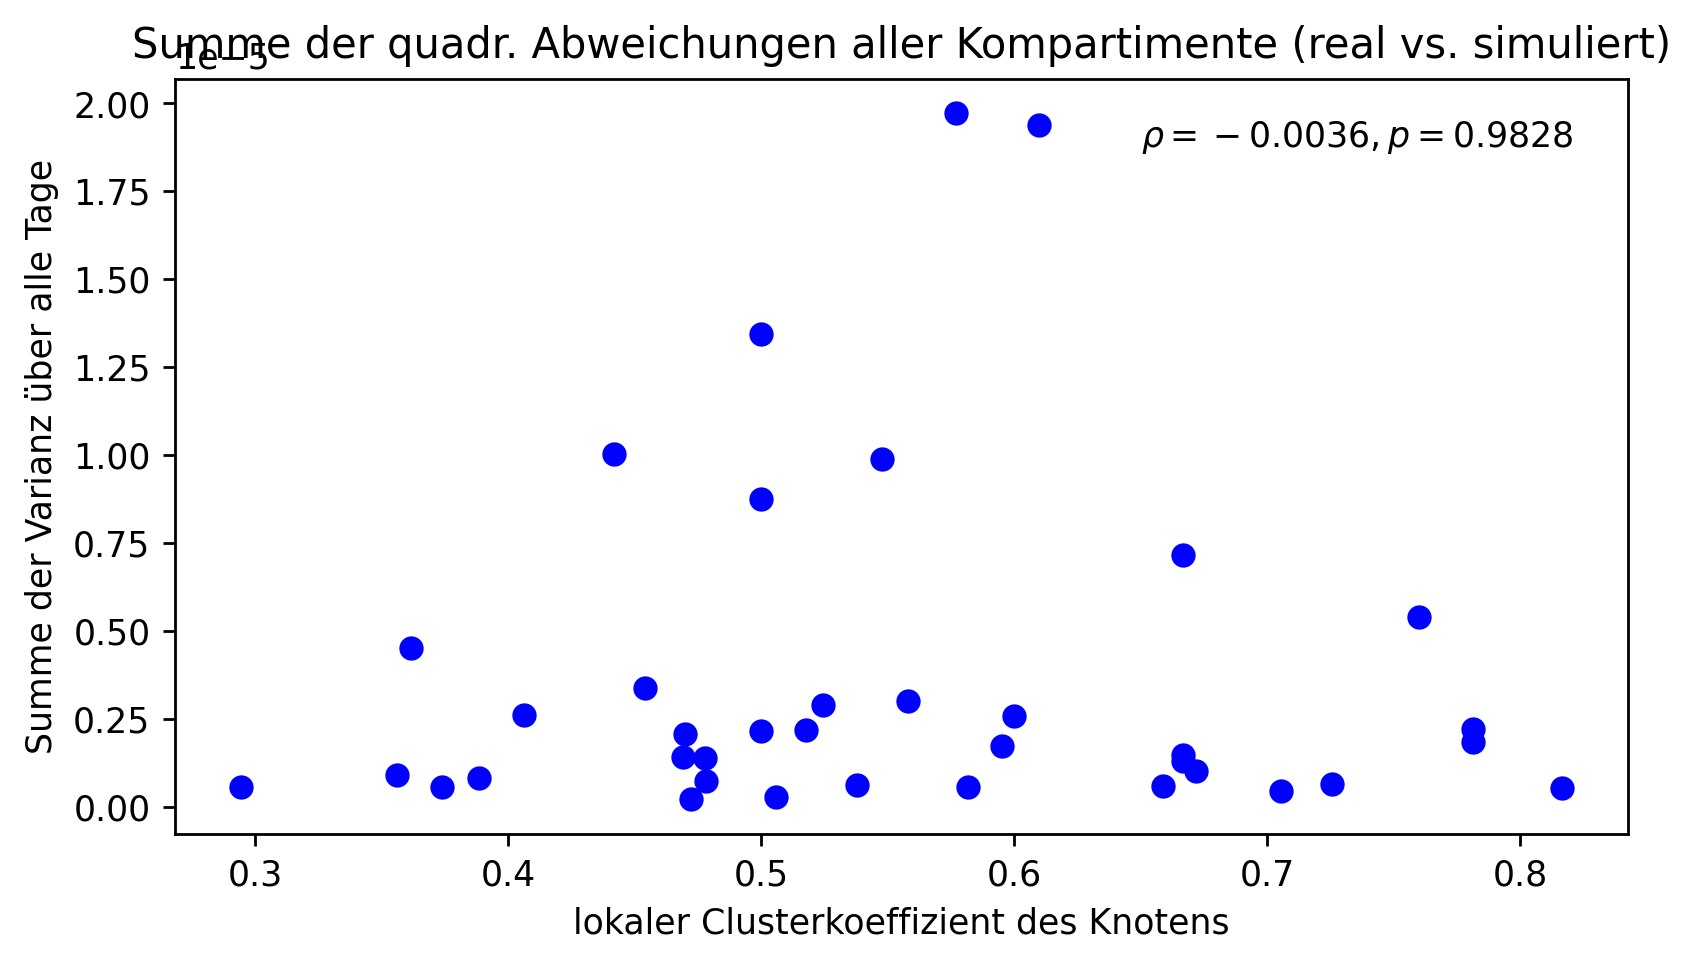

In [48]:
## mit Clusterkoeffizient
cc=np.load("Internal Data/local_clustering_coeffs.npy")
# Regression

def fh_cc(x, a, b): 
	return a*x+b
p0 = [0, 0.1]
fith_cc, errh_cc = opt.curve_fit(fh_cc, cc, heavi_I_var, p0)

plt.figure(figsize=(7.5,4),dpi=250)
plt.title("Summe der quadr. Abweichungen aller Kompartimente (real vs. simuliert)")
plt.xlabel('lokaler Clusterkoeffizient des Knotens')
plt.ylabel(r"Summe der Varianz über alle Tage")
plt.scatter(cc, heavi_I_var,marker='o',color='blue')
#plt.plot(np.linspace(0.2,0.85,500), fh_cc(np.linspace(0,0.85,500), *fith_cc), label="Regression",color='red')
plt.text(0.65,0.0075/400, r"$\rho=-0.0036, p=0.9828$")
#plt.legend(loc='upper right', )
plt.savefig("Media/Boundaries/Boundaries_38_cc_h.pdf")

In [49]:
from scipy import stats
r_h_p_cc=stats.pearsonr(cc, heavi_I_var,)
r_h_s_cc=stats.spearmanr(cc,heavi_I_var)
print("Korrelationskoeffizient (Pearson) r=",r_h_p_cc[0], "p=", r_h_p_cc[1])
print("Korrelationskoeffizient (Spearman) r=",r_h_s_cc[0], "p=", r_h_s_cc[1])

Korrelationskoeffizient (Pearson) r= 0.012076671863090194 p= 0.9426327268090984
Korrelationskoeffizient (Spearman) r= -0.0036126776511488084 p= 0.9828259446157821


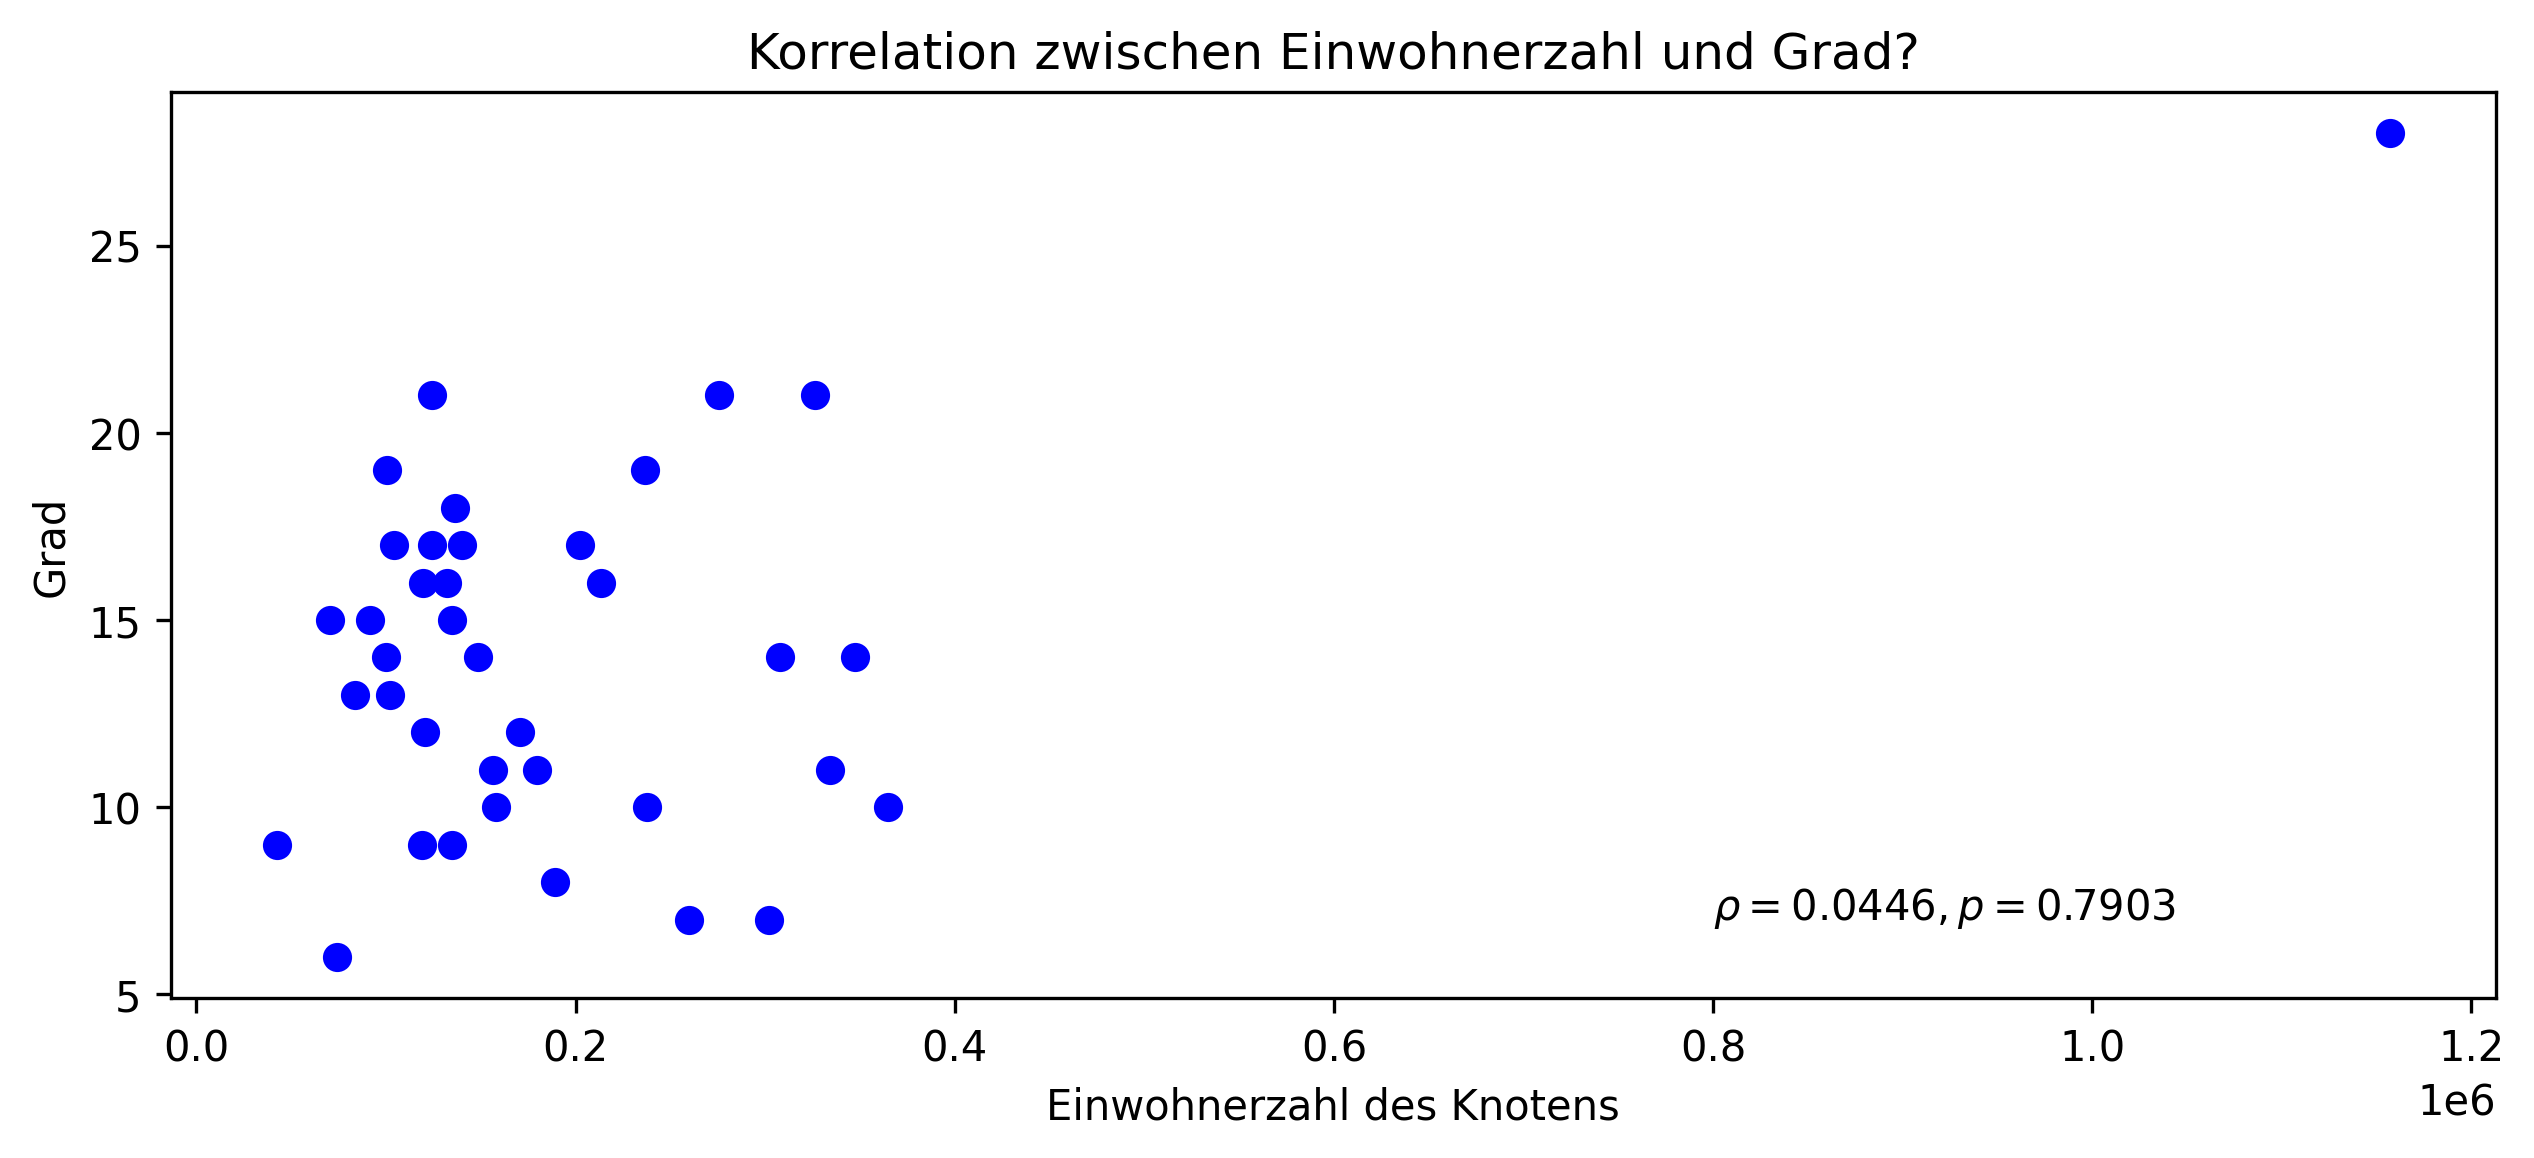

In [51]:
## Korrelation zw. Grad und EWZ
pop = np.loadtxt("Internal Data/popdata38.txt")


plt.figure(figsize=(10,4),dpi=300)
plt.title("Korrelation zwischen Einwohnerzahl und Grad?")
plt.xlabel('Einwohnerzahl des Knotens')
plt.ylabel(r"Grad")
plt.scatter(pop, degree_dist,marker='o',color='blue')
plt.text(8e5,7, r"$\rho=0.0446, p=0.7903$")
#plt.plot(pop, [fh_3(d, *fith_3) for d in pop], label="Regression",color='blue')
#plt.legend(loc='upper right')
plt.savefig("Media/Boundaries/Boundaries_38_3rd_correlation_check.pdf")

In [52]:
r_h_p_3=stats.pearsonr(pop, degree_dist)
r_h_s_3=stats.spearmanr(pop,degree_dist)
print("Korrelationskoeffizient (Pearson) r=",r_h_p_3[0], "p=", r_h_p_3[1])
print("Korrelationskoeffizient (Spearman) r=",r_h_s_3[0], "p=", r_h_s_3[1])

Korrelationskoeffizient (Pearson) r= 0.42824846180278 p= 0.007311556342089136
Korrelationskoeffizient (Spearman) r= 0.04459941314909746 p= 0.7903335951576438


## Analysis viewed in a network

In [29]:
# define custom colormap, can be ignored
ccmatrix = np.array([[43,76,253],[44,78,252],[44,81,251],[45,83,250],[45,85,249],[45,88,248],[46,90,247],[46,93,246],[47,95,245],[47,98,244],[48,100,243],[48,103,242],[48,105,241],[49,107,240],[49,110,239],[50,112,238],[50,115,237],[50,117,236],[51,120,235],[51,122,234],[52,124,233],[52,127,232],[53,129,231],[53,132,230],[53,134,229],[54,137,228],[54,139,227],[55,142,226],[55,144,225],[56,146,224],[56,149,223],[56,151,222],[57,154,221],[57,156,220],[58,159,219],[58,161,218],[59,163,217],[59,166,216],[59,168,215],[60,171,214],[60,173,213],[61,176,212],[61,178,211],[62,180,210],[62,183,209],[62,185,209],[63,188,208],[63,190,207],[64,193,206],[64,195,205],[64,198,204],[65,200,203],[65,202,202],[66,205,201],[66,207,200],[67,210,199],[67,212,198],[67,215,197],[68,217,196],[68,219,195],[69,222,194],[69,224,193],[70,227,192],[70,229,191],[71,231,189],[72,231,187],[74,231,184],[76,231,181],[77,231,179],[79,231,176],[80,231,173],[82,231,171],[84,231,168],[85,231,165],[87,231,163],[89,231,160],[90,231,157],[92,231,155],[93,231,152],[95,230,149],[97,230,147],[98,230,144],[100,230,141],[102,230,139],[103,230,136],[105,230,133],[106,230,130],[108,230,128],[110,230,125],[111,230,122],[113,230,120],[115,230,117],[116,230,114],[118,230,112],[119,230,109],[121,230,106],[123,230,104],[124,230,101],[126,230,98],[128,230,96],[129,230,93],[131,230,90],[132,230,88],[134,230,85],[136,230,82],[137,230,80],[139,230,77],[141,229,74],[142,229,72],[144,229,69],[145,229,66],[147,229,64],[149,229,61],[150,229,58],[152,229,55],[154,229,53],[155,229,50],[157,229,47],[158,229,45],[160,229,42],[162,229,39],[163,229,37],[165,229,34],[167,229,31],[168,229,29],[170,229,26],[171,229,23],[173,229,21],[174,228,19],[174,227,19],[175,226,19],[175,225,18],[175,224,18],[176,223,18],[176,222,17],[176,221,17],[177,220,17],[177,219,16],[177,218,16],[178,216,16],[178,215,16],[178,214,15],[179,213,15],[179,212,15],[179,211,14],[180,210,14],[180,209,14],[180,208,13],[181,207,13],[181,206,13],[181,205,13],[182,204,12],[182,203,12],[183,202,12],[183,200,11],[183,199,11],[184,198,11],[184,197,10],[184,196,10],[185,195,10],[185,194,9],[185,193,9],[186,192,9],[186,191,9],[186,190,8],[187,189,8],[187,188,8],[187,187,7],[188,186,7],[188,184,7],[188,183,6],[189,182,6],[189,181,6],[189,180,6],[190,179,5],[190,178,5],[190,177,5],[191,176,4],[191,175,4],[191,174,4],[192,173,3],[192,172,3],[192,171,3],[193,170,3],[193,168,2],[193,167,2],[194,166,2],[194,165,1],[194,164,1],[195,163,1],[195,162,0],[195,161,0],[196,159,0],[197,156,0],[198,154,0],[199,151,0],[200,149,0],[201,146,0],[202,144,0],[203,141,0],[204,139,0],[205,136,0],[206,134,0],[207,131,0],[208,129,0],[209,126,0],[209,124,0],[210,121,0],[211,118,0],[212,116,0],[213,113,0],[214,111,0],[215,108,0],[216,106,0],[217,103,0],[218,101,0],[219,98,0],[220,96,0],[221,93,0],[222,91,0],[223,88,0],[224,86,0],[225,83,0],[226,81,0],[226,78,0],[227,76,0],[228,73,0],[229,71,0],[230,68,0],[231,66,0],[232,63,0],[233,61,0],[234,58,0],[235,55,0],[236,53,0],[237,50,0],[238,48,0],[239,45,0],[240,43,0],[241,40,0],[242,38,0],[243,35,0],[243,33,0],[244,30,0],[245,28,0],[246,25,0],[247,23,0],[248,20,0],[249,18,0],[250,15,0],[251,13,0],[252,10,0],[253,8,0],[254,5,0],[255,3,0],[255,0,0]])

custom_cm = matplotlib.colors.ListedColormap(ccmatrix/255.0)

In [120]:
region_ids, labels, short_labels = region_setup(38)
nw_mat = np.loadtxt("Pendler.txt")
undirect_adjacency(nw_mat)
scl = np.sqrt(3)/2
distinct_pos = {0:(9,20*scl), 1:(6,14*scl), 2:(12,10*scl), 3:(3,12*scl), 4:(9,16*scl), 5:(9,12*scl), 6:(15,8*scl), 7:(6,10*scl), 8:(6,6*scl), 9:(9,8*scl), 10:(12,2*scl), 11:(12,6*scl), 12:(6,22*scl), 13:(3,20*scl), 14:(6,18*scl), 15:(3,16*scl), 16:(0,18*scl), 17:(0,14*scl), 18:(0,10*scl), 19:(0,6*scl), 20:(3,8*scl), 21:(3,4*scl), 22:(3,0), 23:(6,2*scl), 24:(9,0), 25:(9,4*scl), 26:(15,0), 27:(15,4*scl), 28:(18,6*scl), 29:(18,10*scl), 30:(18,14*scl), 31:(18,18*scl), 32:(15,16*scl), 33:(15,20*scl), 34:(15,12*scl), 35:(12,18*scl), 36:(12,14*scl), 37:(12,22*scl)}

# Colormap

ccm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=plt.Normalize(vmin = 0, vmax=max(heavi_I_var)))
ccm._A = []  

def create_colored_network(matrix,pos,colors):
    """creates and plots undirected weighted network

    Args:
        matrix (array): undirected weighted adjacency matrix
        pos (dictionary): node positions
    """    
    G = nx.DiGraph()
    dim=len(matrix[0])
    for i in range(dim): 
        for j in range(dim): 
            if matrix[i][j] > 0: 
                G.add_edge(i,j, weight=matrix[i][j])
    weights = [np.sqrt(G[u][v]['weight']/500) for u,v in G.edges]
    plt.figure(figsize=(10,6),dpi=300)
    plt.title("Mittlere quadratische Abweichung $\zeta$ pro Tag und Kompartiment")
    nx.draw_networkx(G,pos, labels=short_labels,node_size=1100, with_labels=True, font_color='white', width=weights, node_color=colors ,edge_color='grey',cmap=plt.cm.rainbow,vmin=0, vmax=max(heavi_I_var),arrowsize=1e-10)
    plt.colorbar(ccm)
    plt.savefig('Media/Networks/Network_Analysis.png')
    plt.show()
    return G, weights

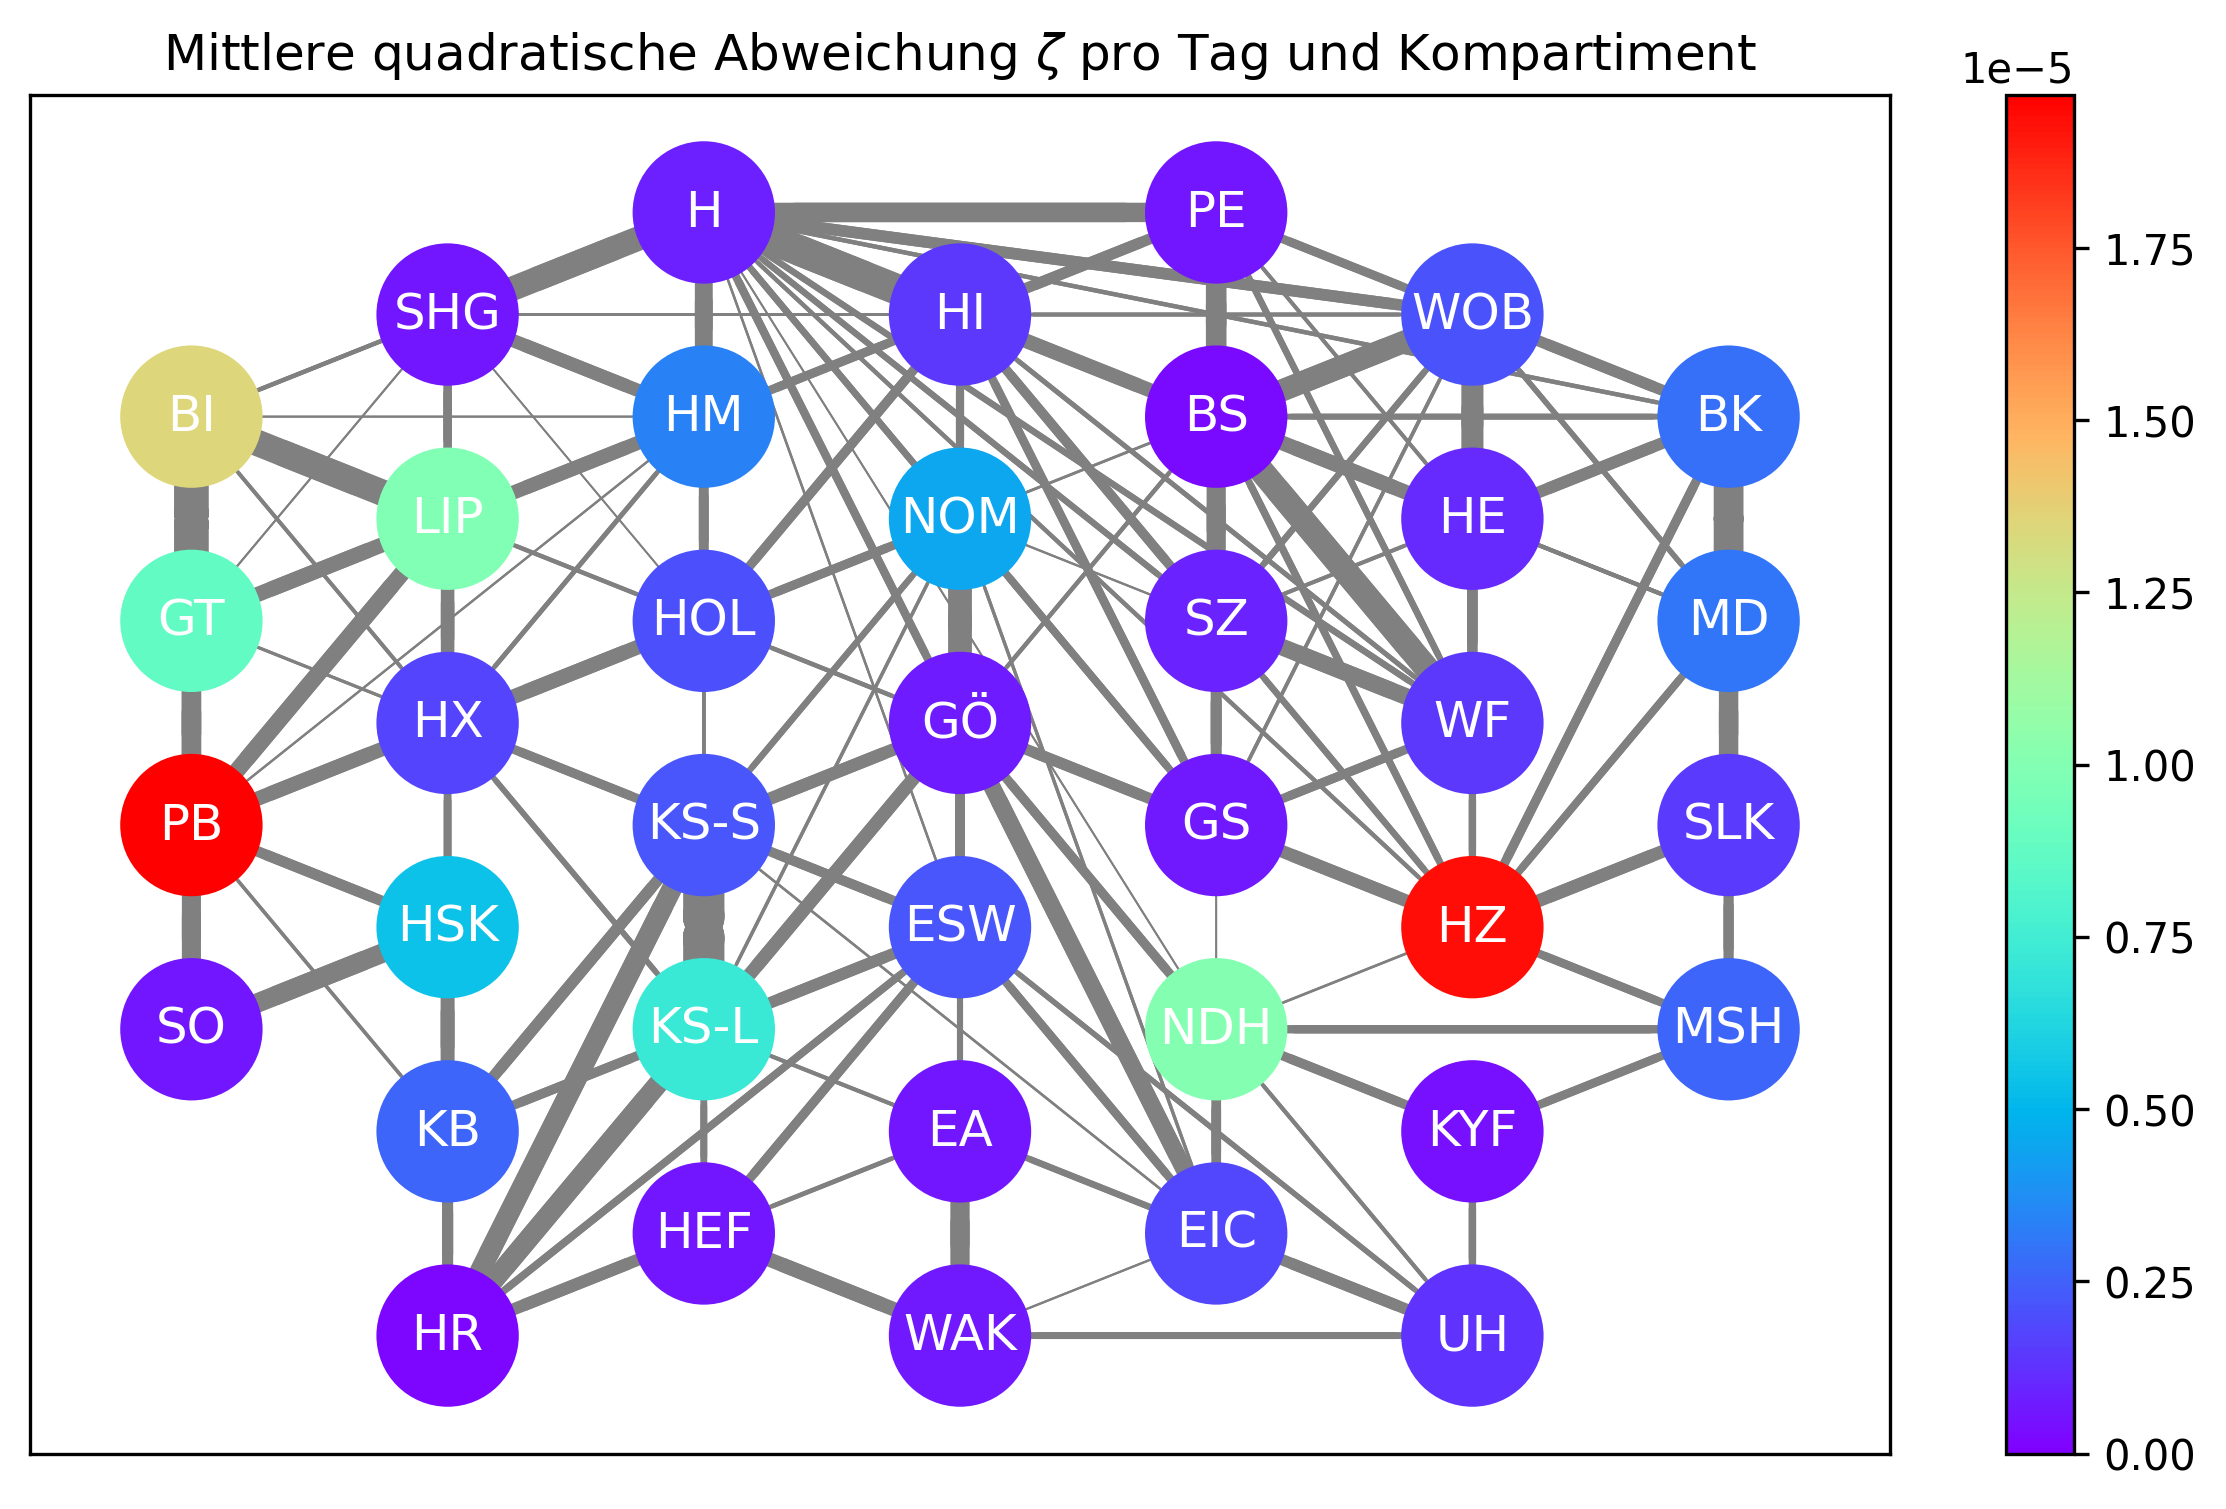

In [122]:
nw38 = create_colored_network(nw_mat, distinct_pos, heavi_I_var)

## Network Video

In [62]:
np.max(heavi_I_data)

0.0026362420410405967

In [204]:
ccm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=plt.Normalize(vmin = 0, vmax=np.max(heavi_I_data)))
ccm._A = []

def plot_cstate(animation_time, graph, weights, pos):
    """plots the network with a dictinct, time-dependent colormap

    Args:
        animation_time (int): time input in days
        graph (networkx graph): already setup graph
        weights (array): edge thickness
        pos ([type]): node positions
        colors ([type]): node colors

    Returns:
        drawn network: frame
    """   
    ccm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=plt.Normalize(vmin = 0, vmax=np.max(heavi_I_data)))
    ccm._A = []
    
    colors=[]
    for node in graph:
        colors.append((heavi_I_data[node][animation_time]))
    q=nx.draw_networkx(graph,distinct_pos, labels=short_labels,node_size=500, with_labels=True, font_color='white', font_size=10, width=weights, node_color=colors ,edge_color='grey',cmap=plt.cm.rainbow,vmin=0, vmax=np.max(heavi_I_data),arrowsize=1e-10)
    return q

def plot_cstate_optimized(animation_time):
    return plot_cstate(animation_time, nw38[0], nw38[1], distinct_pos)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


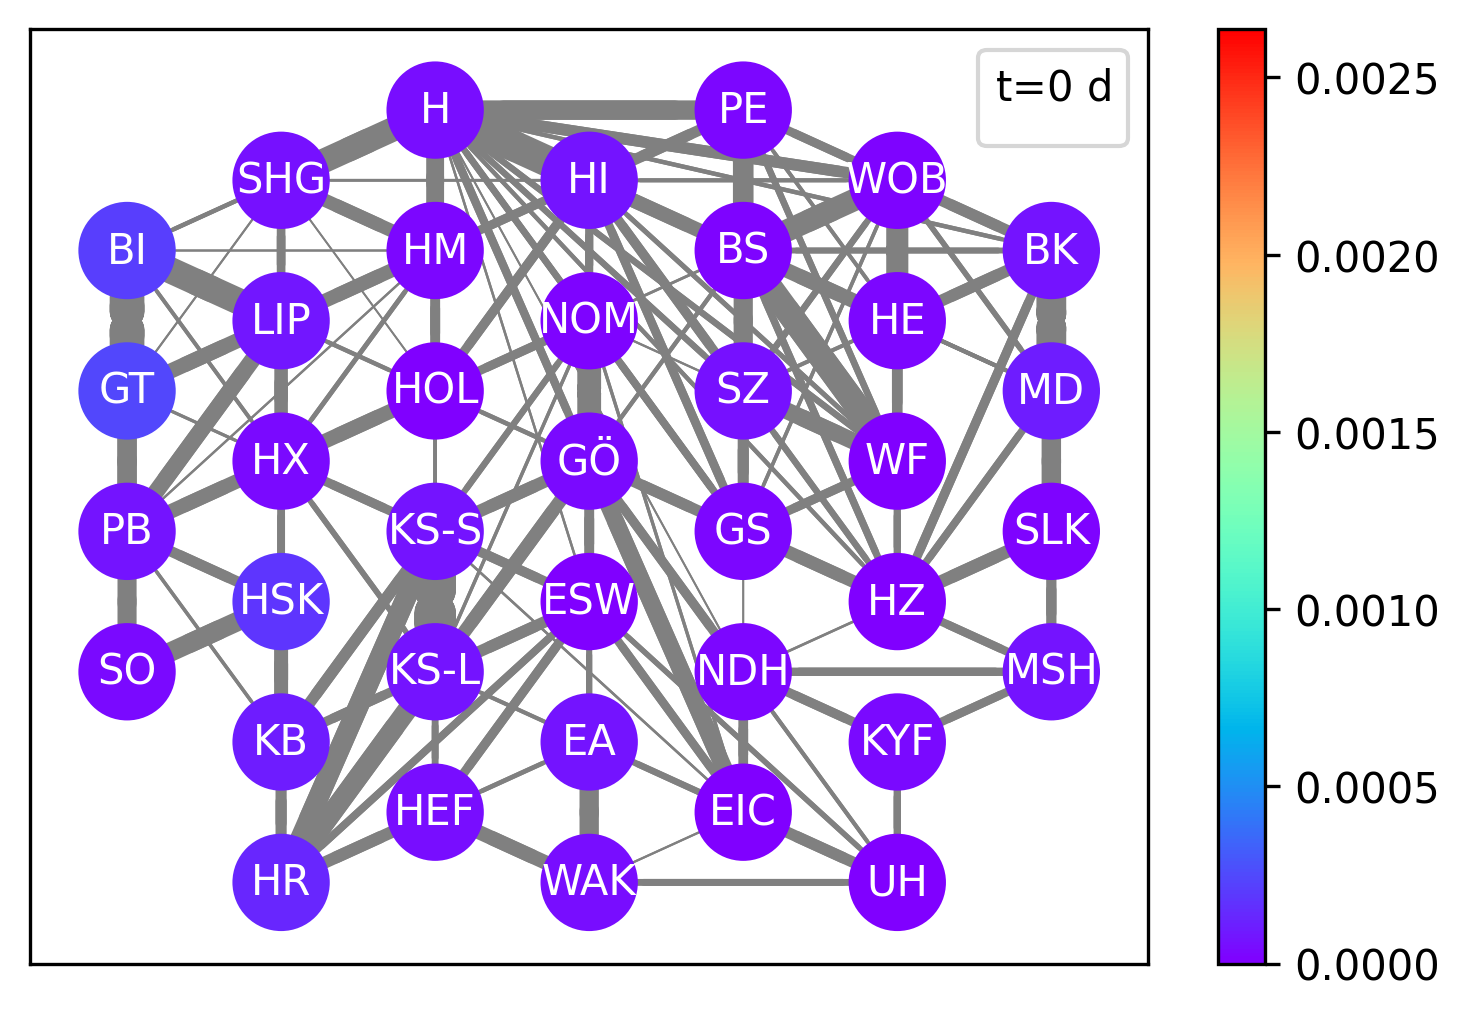

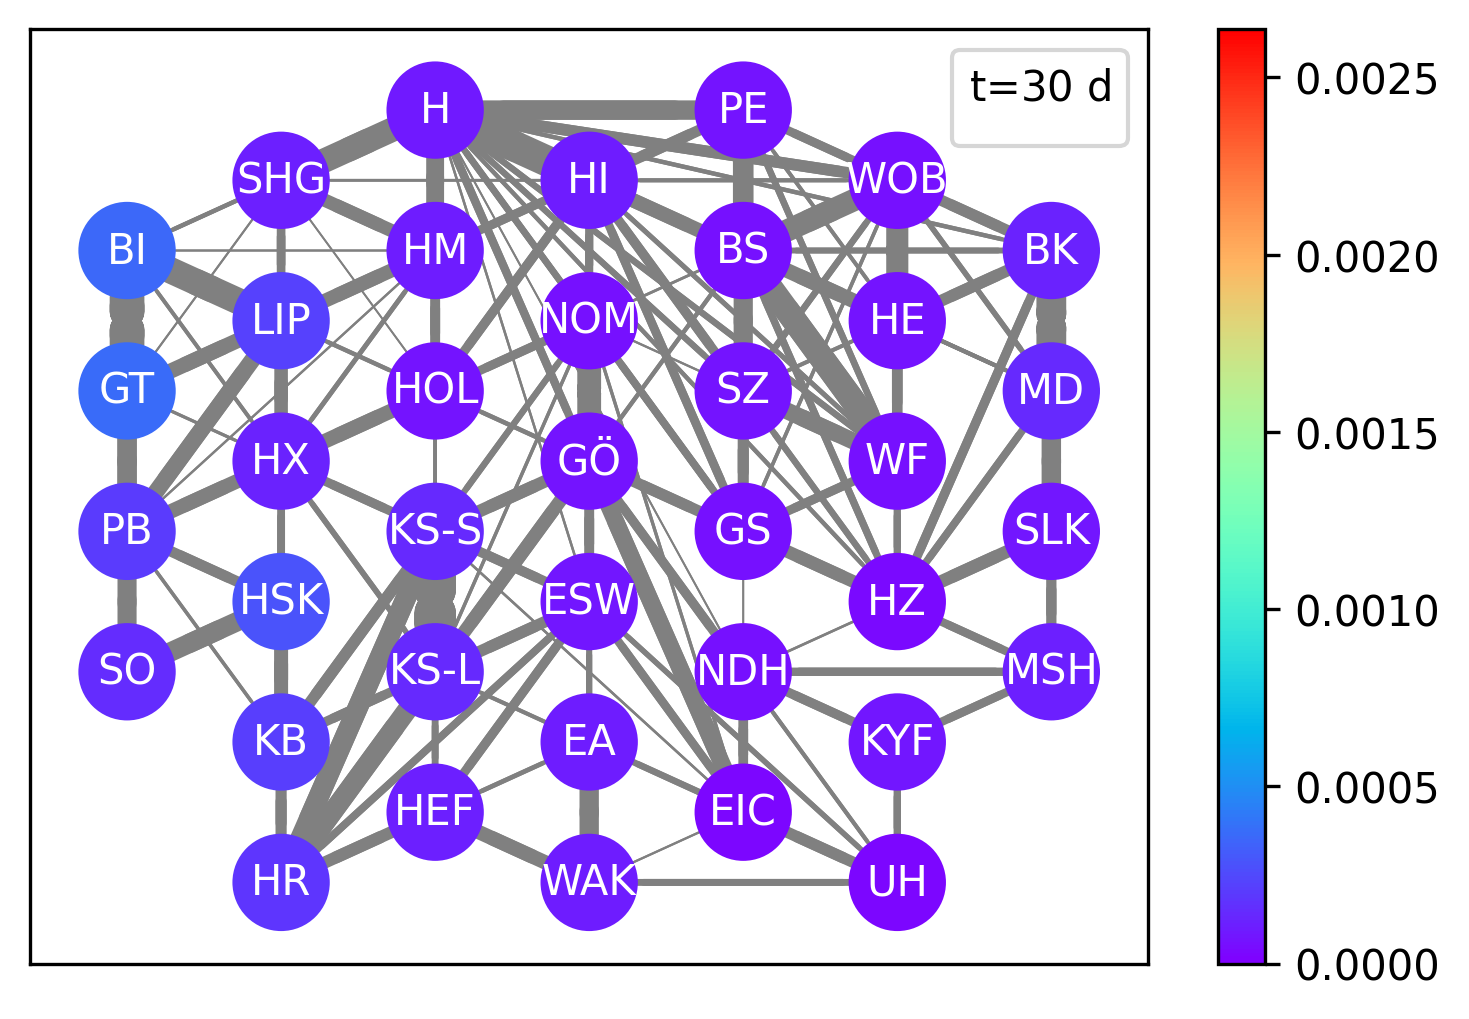

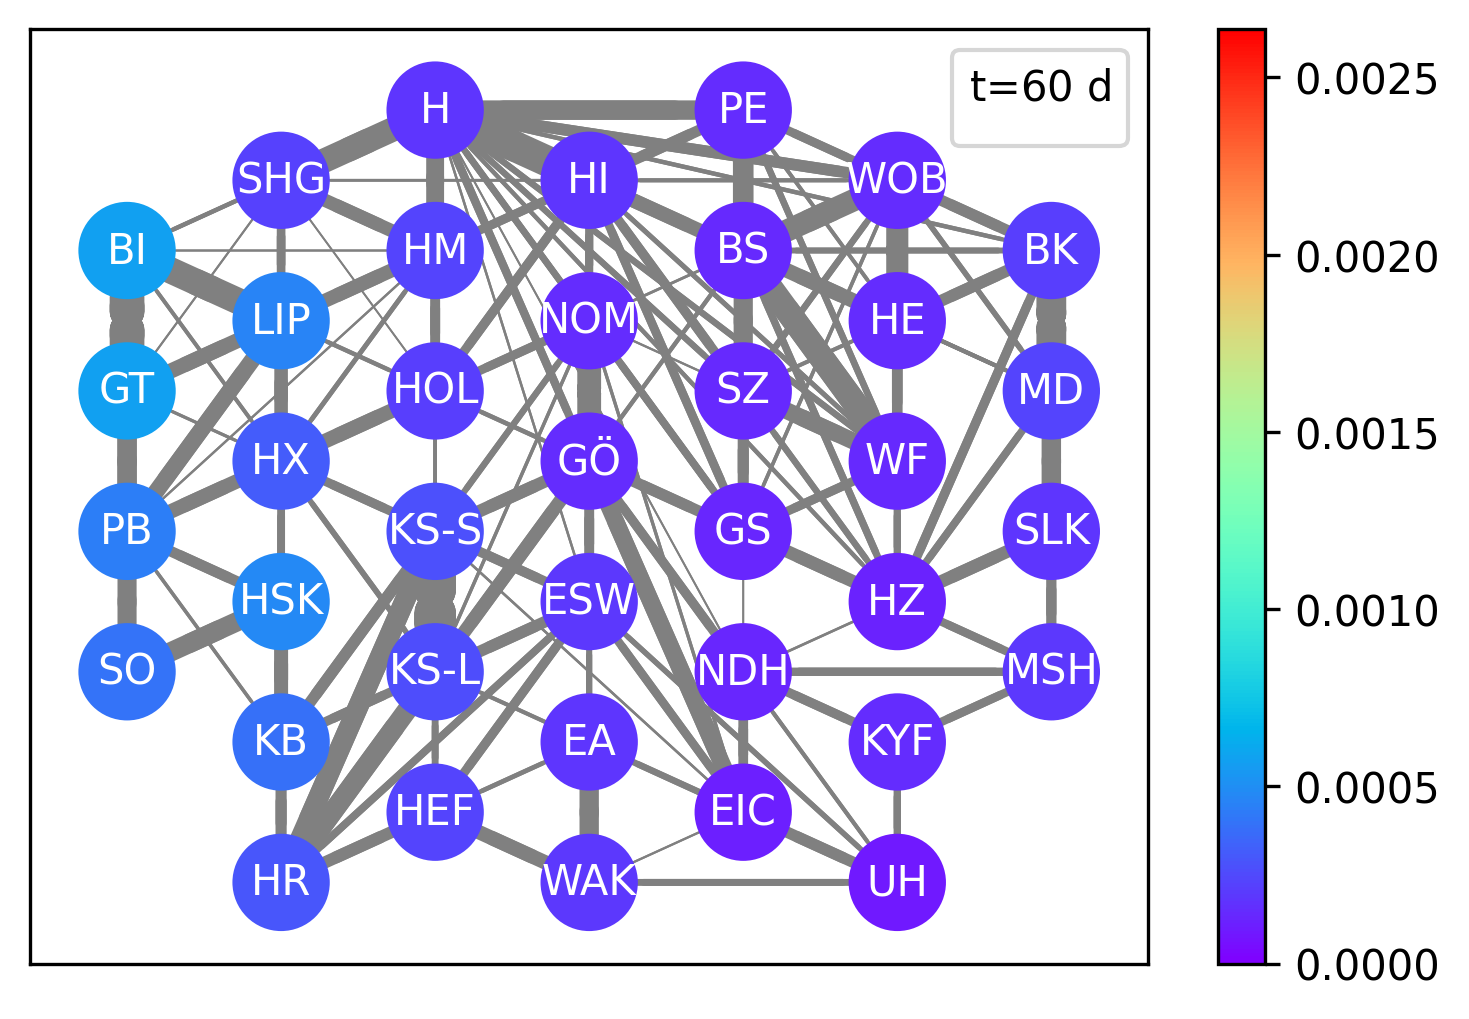

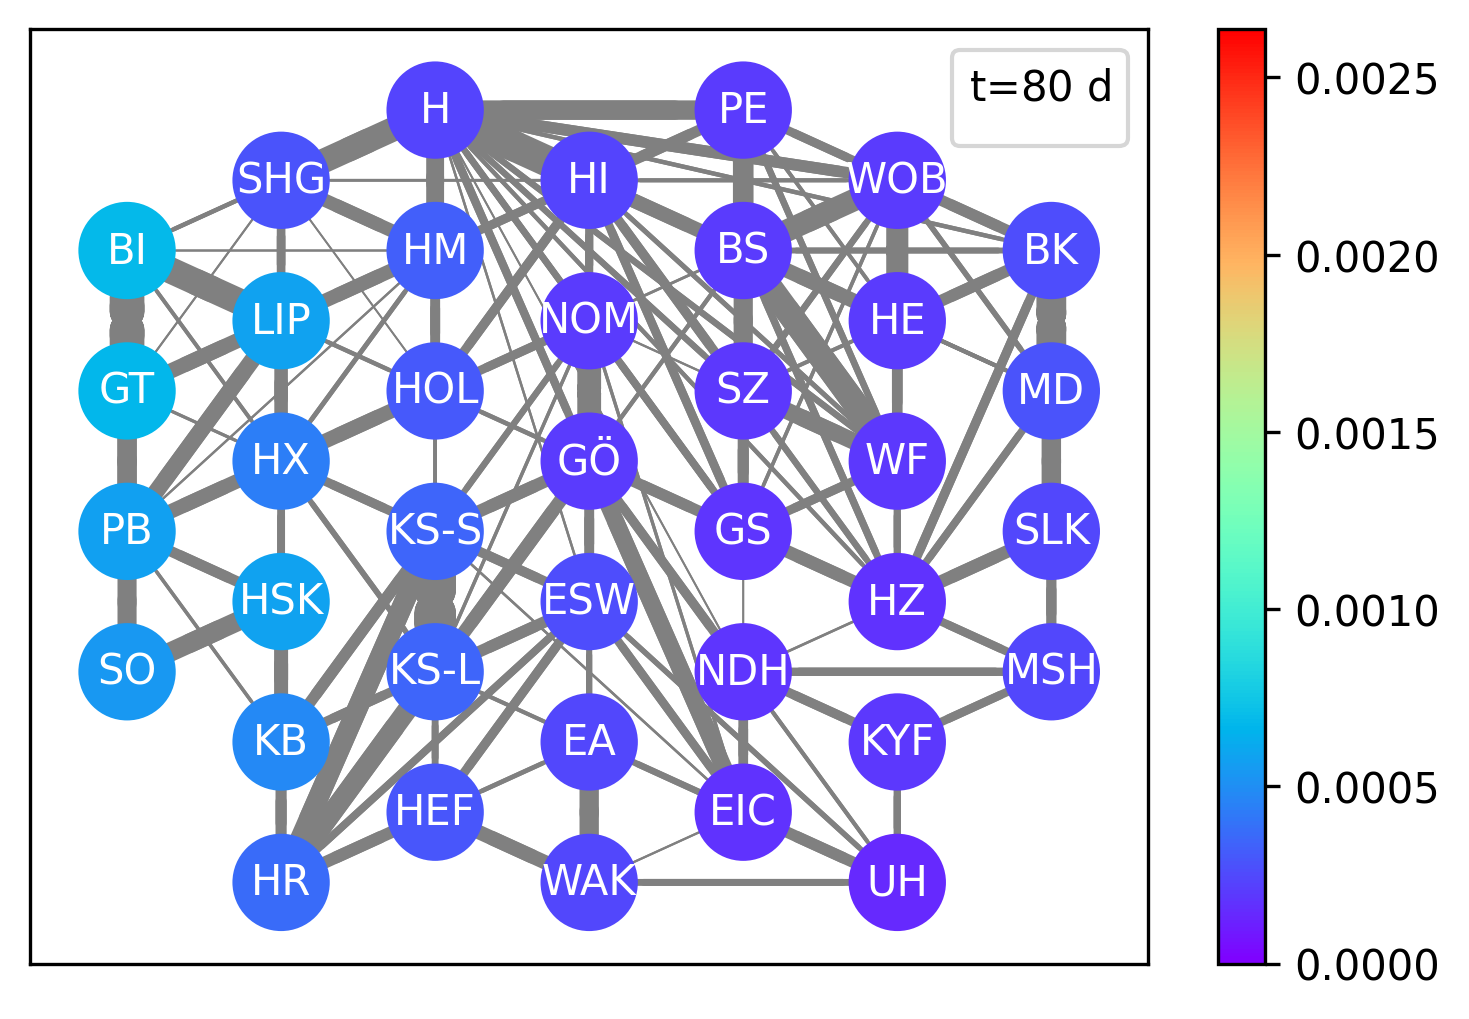

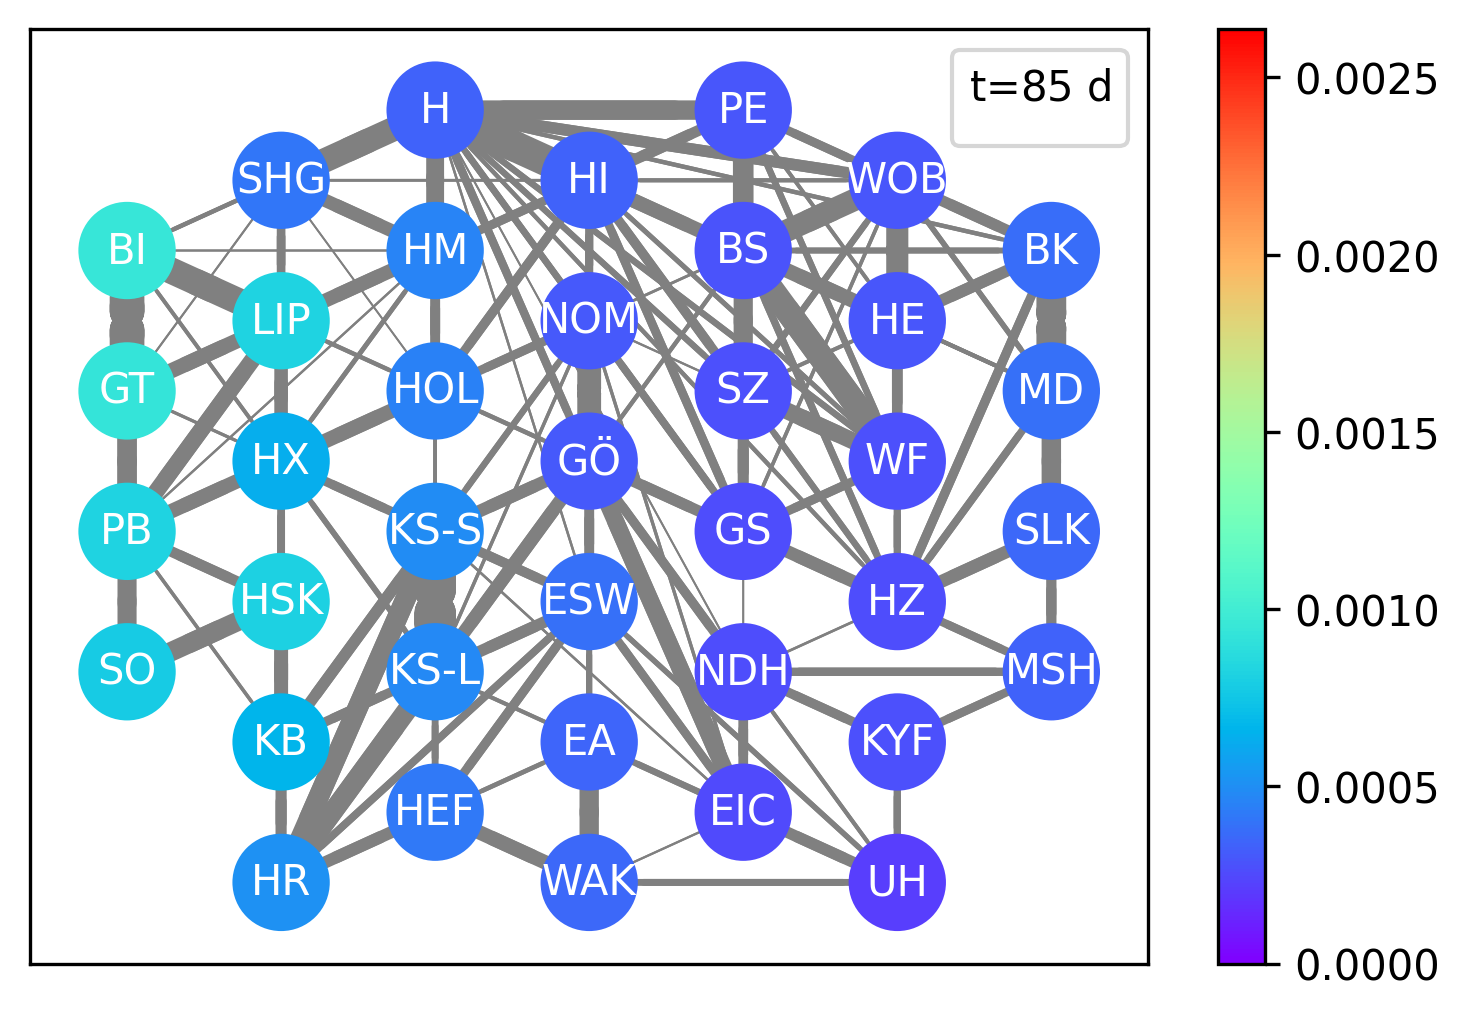

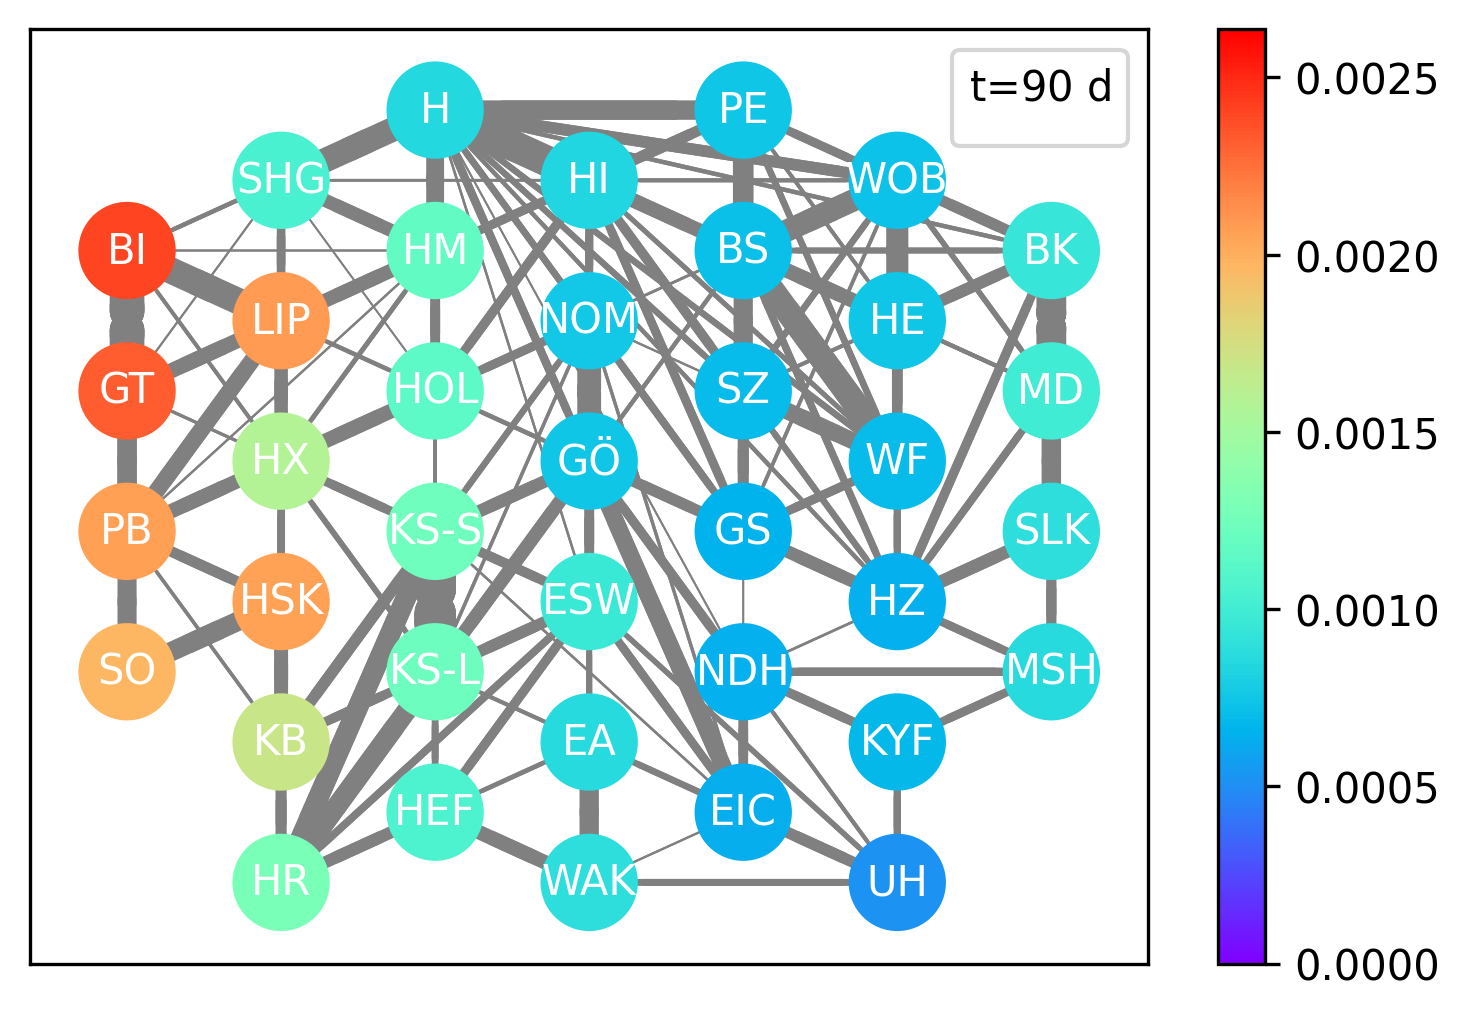

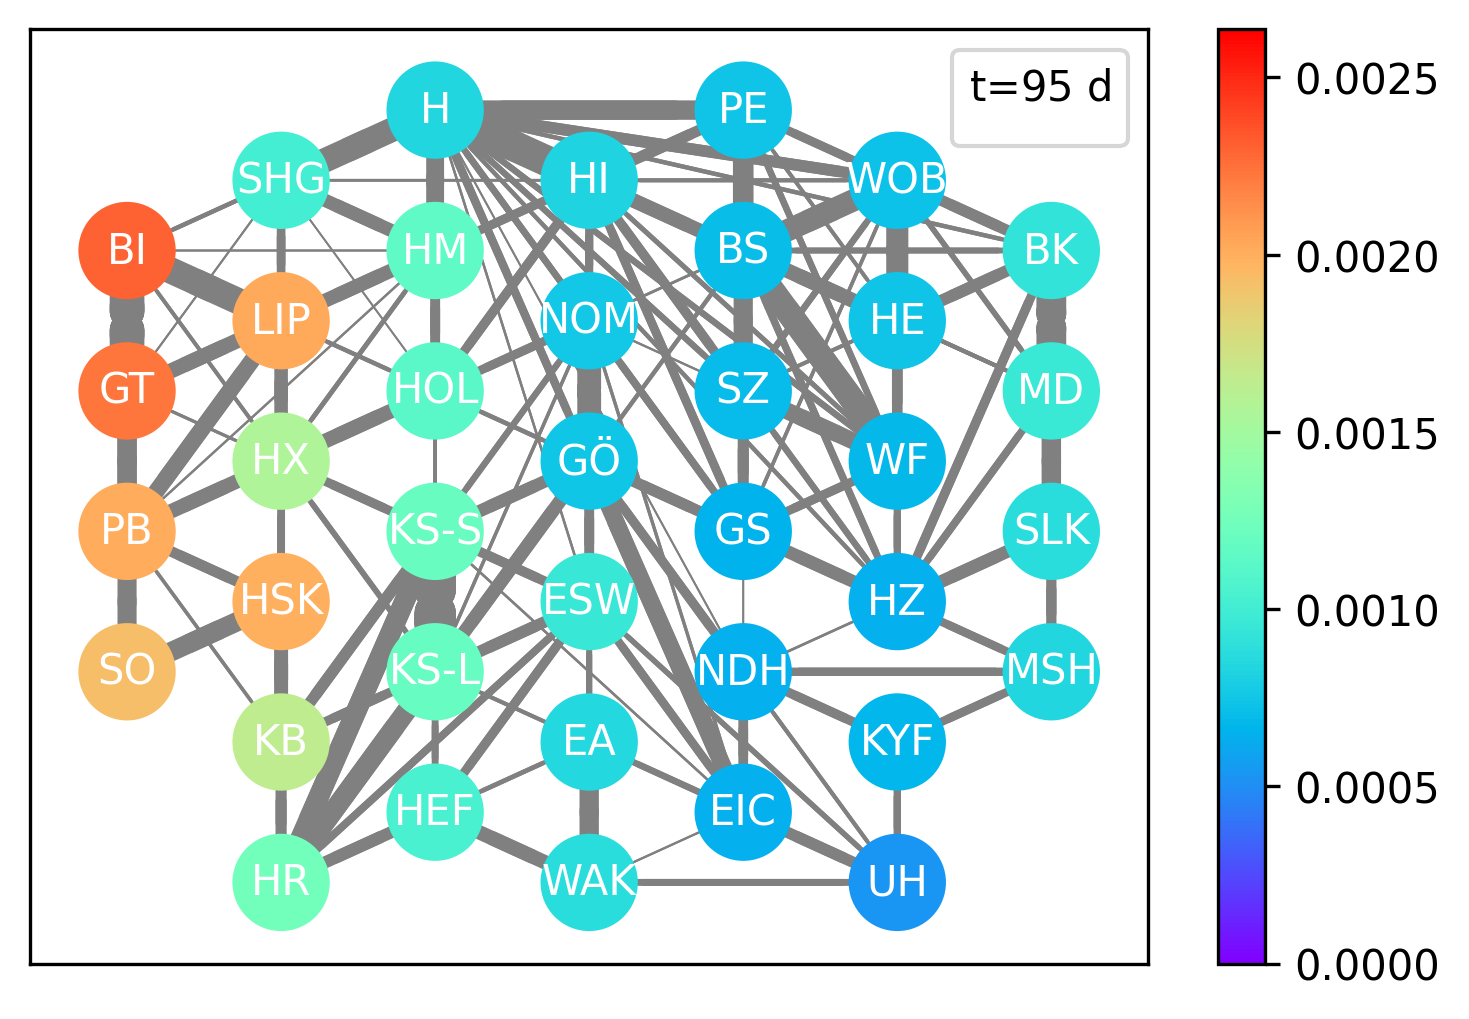

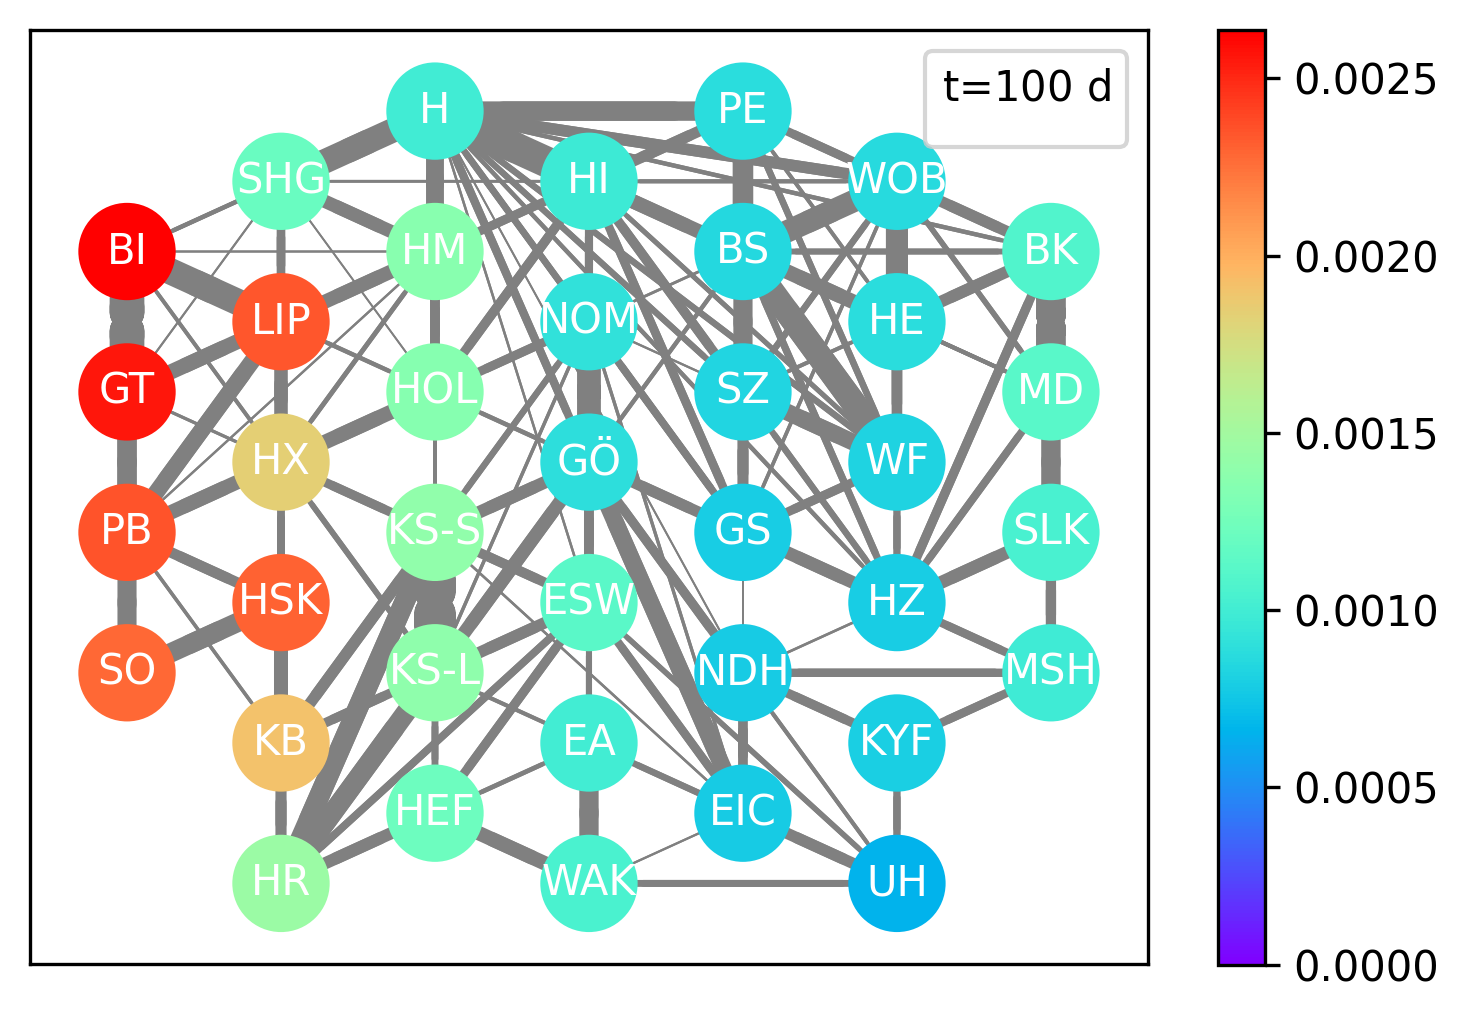

In [208]:
for day in [0,30,60,80,85,90,95,100]:
    plt.figure(figsize=(5,3.5),dpi=300, tight_layout=True)
    plot_cstate_optimized(day)
    #plt.title('Anteil der aktuell Infizierten (I)')
    plt.colorbar(ccm)
    plt.legend(title='t='+str(day)+'$~$d', loc = 'upper right')
    plt.savefig("Media/Networks/flipbook_"+str(day)+"_for_grid.pdf")


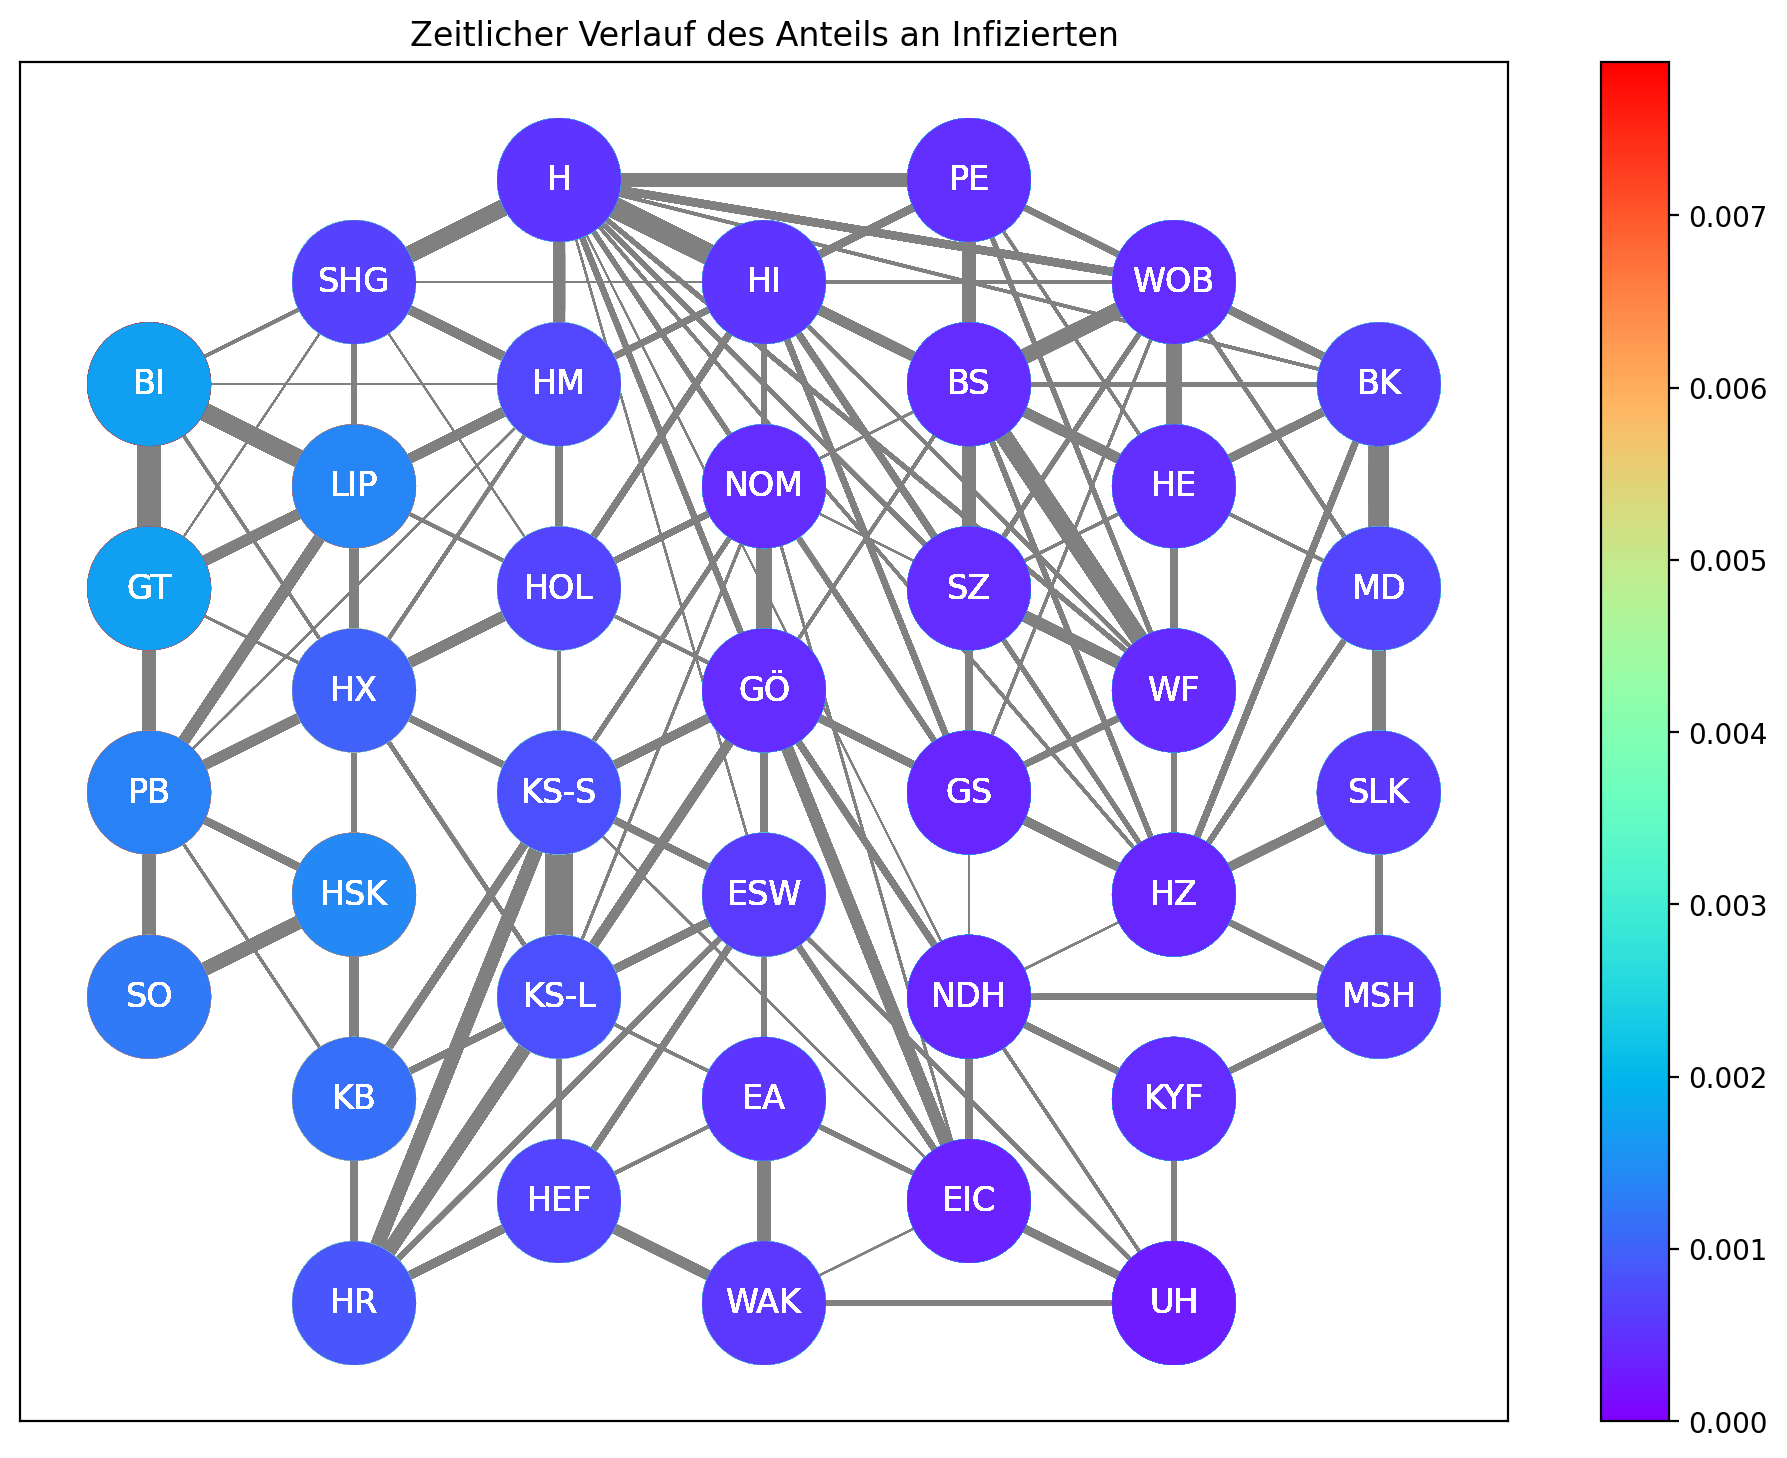

In [75]:
frame_setting=33
interval_setting=10000/frame_setting

plt.figure(figsize=(12,9),dpi=200)
plt.title('Zeitlicher Verlauf des Anteils an Infizierten')
plt.colorbar(ccm)
ani1 = animation.FuncAnimation(plt.gcf(), plot_cstate_optimized,frames=frame_setting, interval=interval_setting, blit=False,repeat_delay=1000)
HTML(ani1.to_html5_video())

## Comparison: LK Göttingen isolated vs in Region of 12 vs in Region of 38

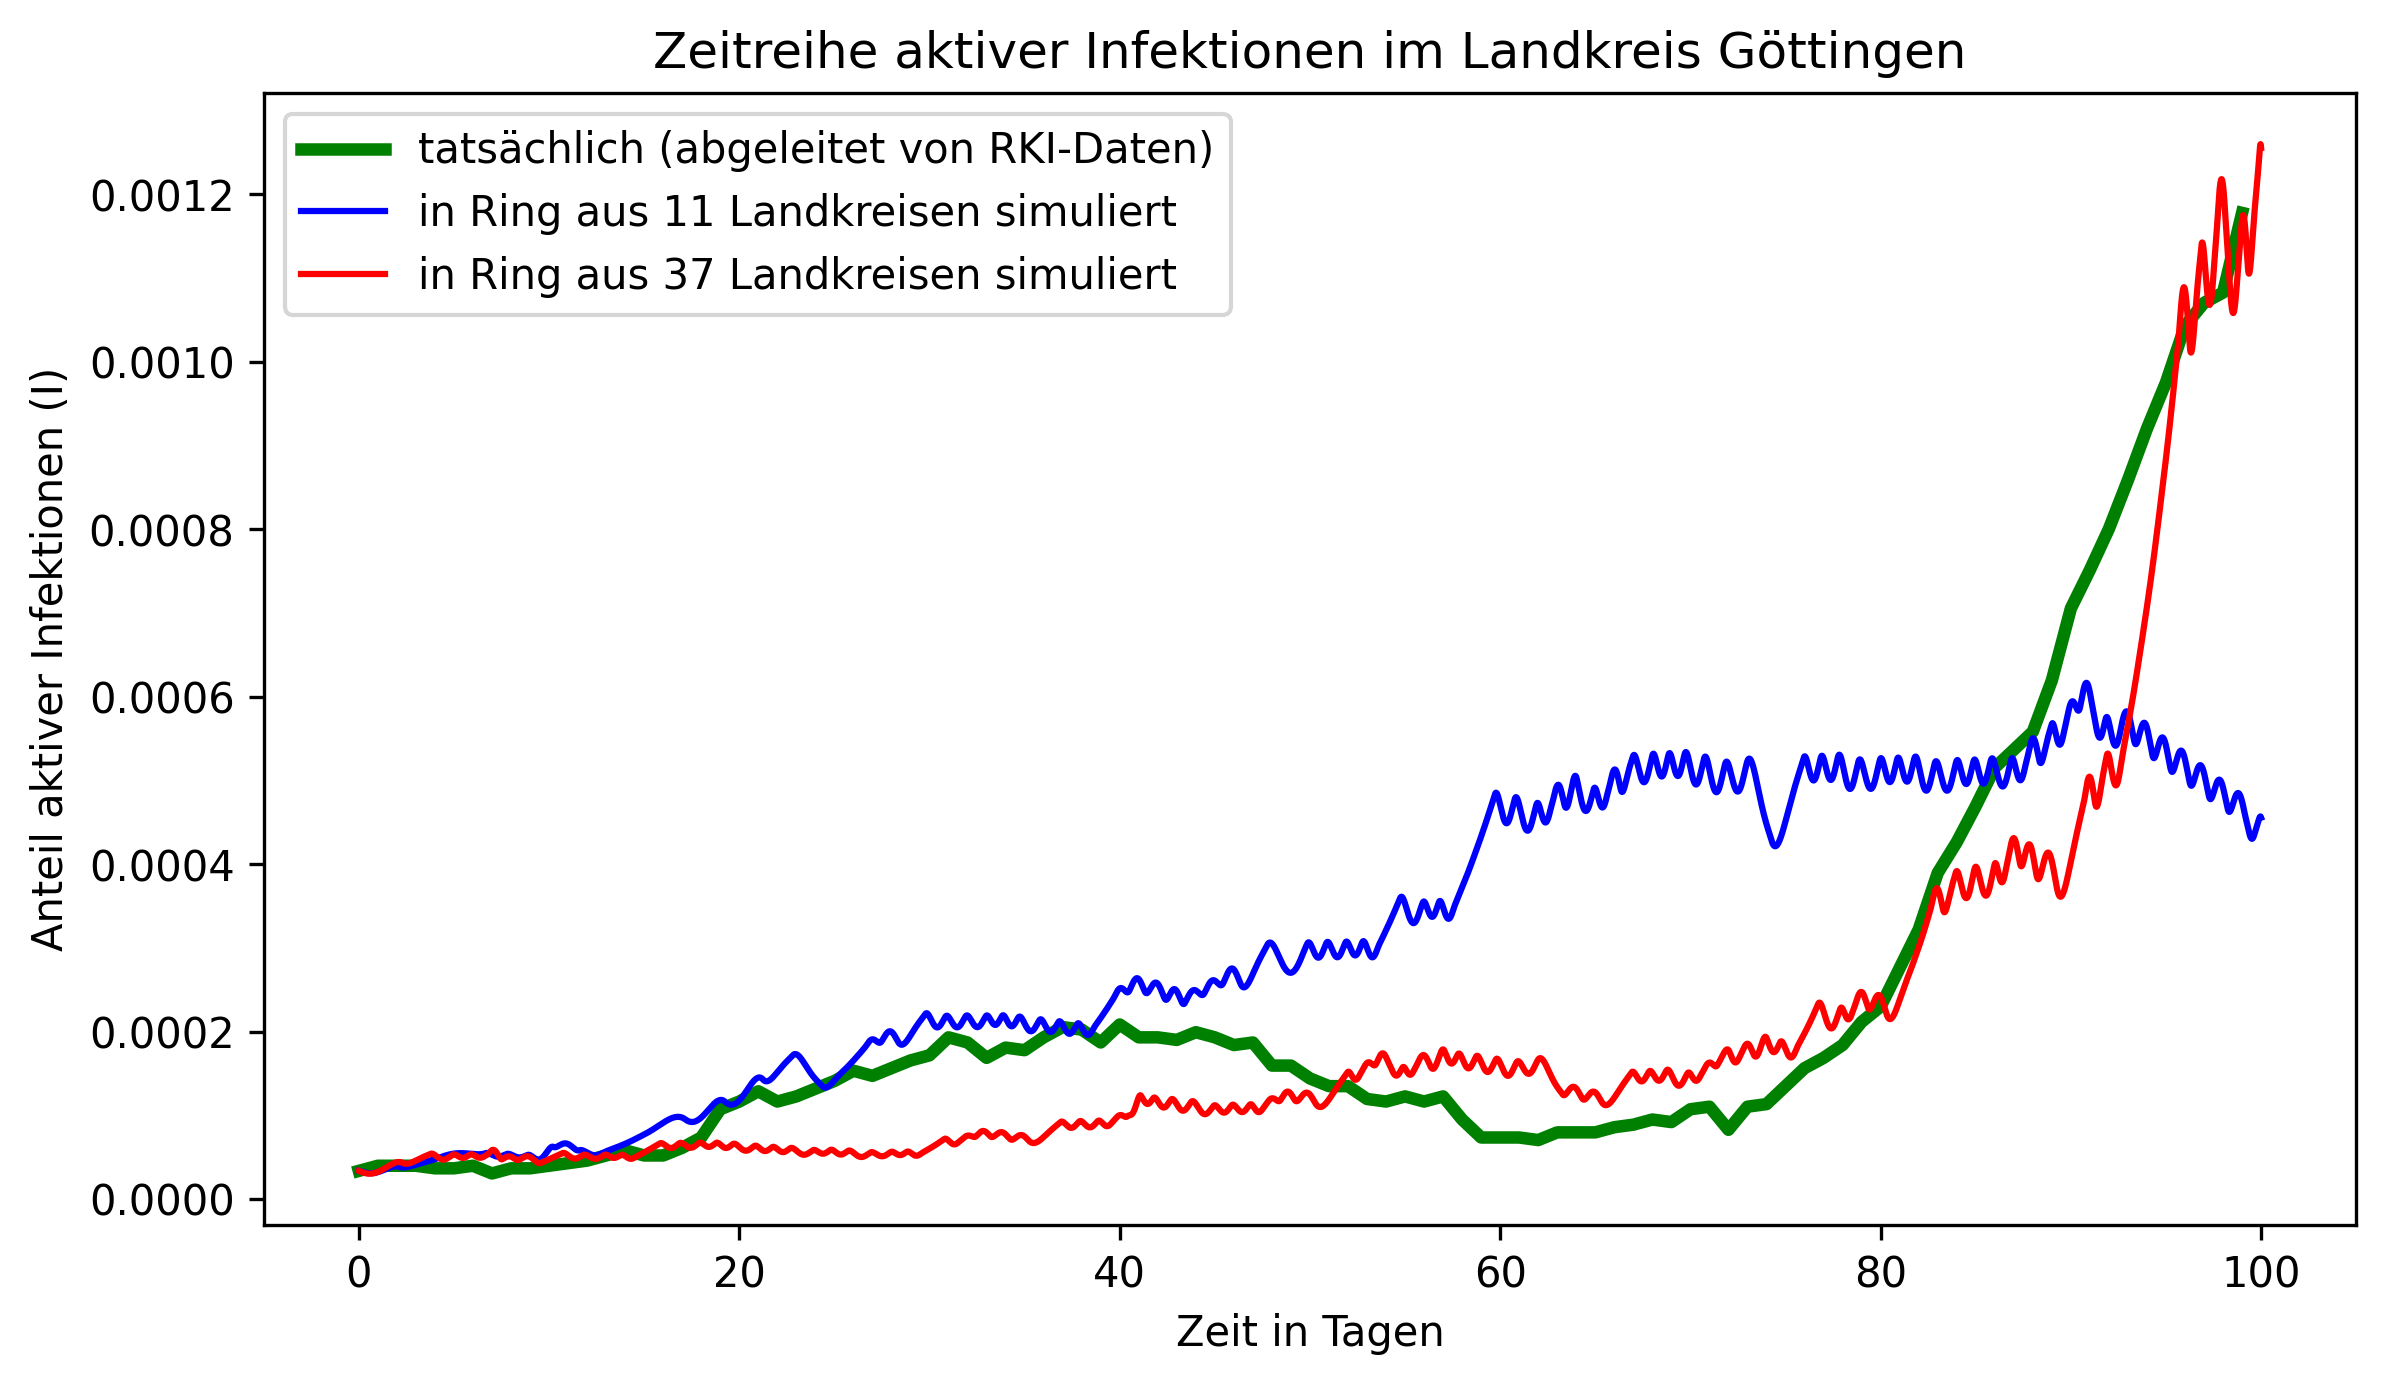

In [165]:
plt.figure(figsize=(9,5), dpi=300)
plt.title("Zeitreihe aktiver Infektionen im Landkreis Göttingen")
plt.plot(range(100), RKI_data[5][1], label="tatsächlich (abgeleitet von RKI-Daten)", color='green', lw=3)
#plt.plot(sol1_1.t, sol1_1.y[1,:], label="isoliert simuliert", color='green')
plt.plot(sol1_12.t, sol1_12.y[5+12,:], label="in Ring aus 11 Landkreisen simuliert", color='blue')
plt.plot(sol1_38.t, sol1_38.y[5+38,:], label="in Ring aus 37 Landkreisen simuliert", color='red')
plt.xlabel("Zeit in Tagen")
plt.ylabel("Anteil aktiver Infektionen (I)")
plt.legend()
plt.savefig("Media/Boundaries/onion.pdf")
plt.show()

# Comparison: Optimized Data vs Real Data

In [209]:
RKI_data = np.load("Internal Data/timeline.npy")
pop = np.loadtxt("Internal Data/popdata38.txt")
lab = region_setup(38)[1]

def plot_both_I(intern_id, log=False):
    I_real = RKI_data[intern_id][1]
    I_sim = sol1_38_all.y[intern_id+38,:]
    plt.figure(figsize=(4,4),dpi=300, tight_layout=True)
    if(log==True):
        plt.yscale("log")
    plt.plot(np.linspace(0,100,len(I_real)),I_real, label="real")
    plt.plot(sol1_38.t, I_sim, label = "simuliert")
    plt.xlabel("Zeit in Tagen")
    plt.ylabel("Anteil aktuell Infizierter (I)")
    plt.legend()
    plt.title(r"Aktuell Infizierte im LK Göttingen")
def plot_all_I(log = False):
    I_real = np.zeros(len(RKI_data[5][1]))
    I_sim = np.zeros(len(sol1_38_all.y[0,:]))
    popsum = np.sum(pop)
    for i in range(38):
        I_real += RKI_data[i][1]*pop[i]
        I_sim += sol1_38_all.y[i+1*38,:]*pop[i]
    I_real = I_real/popsum
    I_sim = I_sim/popsum
    plt.figure(figsize=(10,6))
    if(log):
        plt.yscale("log")
    plt.plot(np.linspace(0,100,len(I_real)),I_real, label="real", color = "red")
    plt.plot(sol1_38_all.t, I_sim, label = "simuliert", color="blue")
    plt.xlabel("Zeit in Tagen")
    plt.ylabel("Anteil aktuell Infizierter (I)")
    plt.legend()
    plt.title(r"Vergleich: RKI-Daten mit optimierter Simulation (Simplex), gesamte Region")
    plt.show()

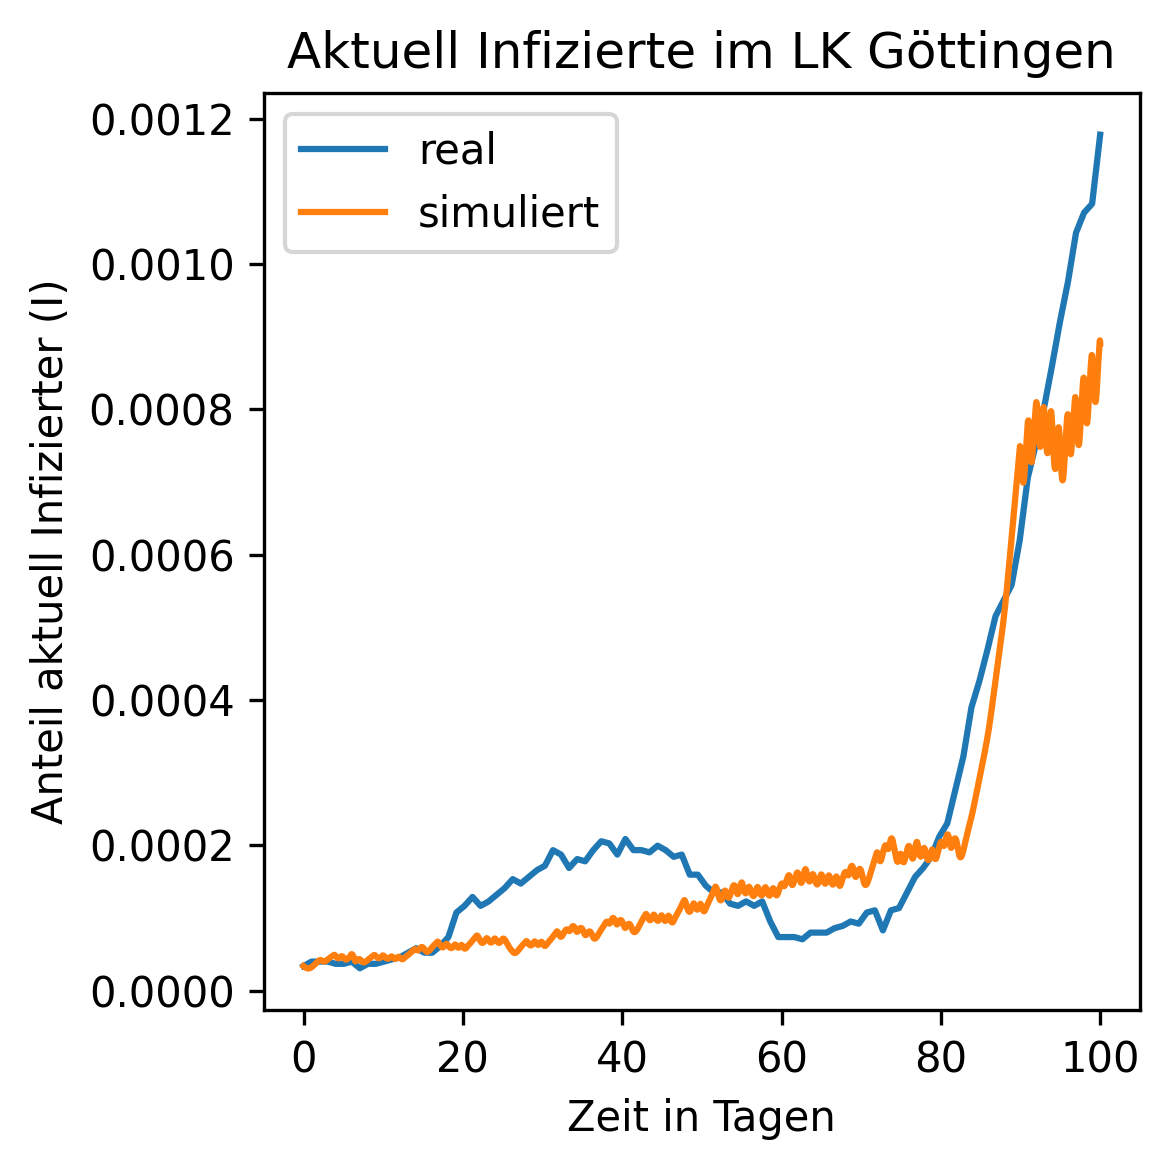

In [210]:
plot_both_I(5) #LK GÖ
plt.savefig("Media/comp_small_goe.pdf")

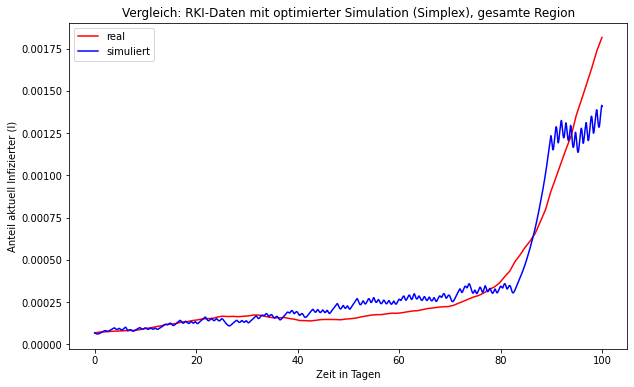

In [117]:
plot_all_I() #complete region